<a href="https://colab.research.google.com/github/HemantAjmer/Ipl_Analysis/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
deliveries = pd.read_csv("https://drive.google.com/uc?export=download&id=1T2Ny5p9FtdXZzmJKUkya37QNDfs2_Uuc")
matches = pd.read_csv("https://drive.google.com/uc?export=download&id=1S4tSZf-dI5GgsAgaSi0dJOxqSQNE1YzG")

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [4]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

# Data cleaning

I've replaced null with 'pass' as it's not good to have nulls and according to me, it's a good replacement.

In [5]:
deliveries['player_dismissed']=deliveries['player_dismissed'].fillna('pass')
deliveries['dismissal_kind']=deliveries['dismissal_kind'].fillna('pass')
deliveries['fielder']=deliveries['fielder'].fillna('pass')

In [6]:
deliveries['player_dismissed'].isna().sum()
deliveries['dismissal_kind'].isna().sum()
deliveries['fielder'].isna().sum()

0

In [7]:
matches.fillna('unknown', inplace=True)

<ipython-input-7-80d7dabd1438>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matches.fillna('unknown', inplace=True)


# Data Understanding:

In [8]:
matches.info()
deliveries.info()

print("Rows and columns in both tables: ")
print("Matches : ")
rows, columns= matches.shape
print("Rows", rows)
print("Columns", columns)
print("\n")
print("Deliveries Table: ")
rows, columns= deliveries.shape
print("Rows", rows)
print("Columns", columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             636 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           636 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  636 non-null    object
 14  venue            636 non-null    object
 15  umpire1          636 non-null    object
 16  umpire2          636 non-null    object
 17  umpire3          636 non-null    ob

In [9]:
numerical_features = deliveries.select_dtypes(include=np.number)
print(numerical_features.describe())

            match_id         inning           over           ball  \
count  150460.000000  150460.000000  150460.000000  150460.000000   
mean      318.281317       1.482188      10.142649       3.616483   
std       182.955531       0.501768       5.674338       1.807698   
min         1.000000       1.000000       1.000000       1.000000   
25%       161.000000       1.000000       5.000000       2.000000   
50%       319.000000       1.000000      10.000000       4.000000   
75%       476.000000       2.000000      15.000000       5.000000   
max       636.000000       4.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  150460.000000  150460.000000  150460.000000  150460.000000   
mean        0.000538       0.037498       0.004885       0.022232   
std         0.023196       0.257398       0.114234       0.200104   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

# Ignore pass

Distribution of batting_team:
batting_team
Mumbai Indians                 18943
Royal Challengers Bangalore    17678
Kings XI Punjab                17594
Kolkata Knight Riders          17229
Delhi Daredevils               17185
Chennai Super Kings            15754
Rajasthan Royals               13914
Sunrisers Hyderabad             9058
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64
--------------------
Distribution of bowling_team:
bowling_team
Mumbai Indians                 18879
Royal Challengers Bangalore    17920
Kolkata Knight Riders          17411
Kings XI Punjab                17392
Delhi Daredevils               17099
Chennai Super Kings            15562
Rajasthan Royals               14111
Deccan Chargers                 9039
Sunrisers Hyderabad             8888
Pune Warriors   

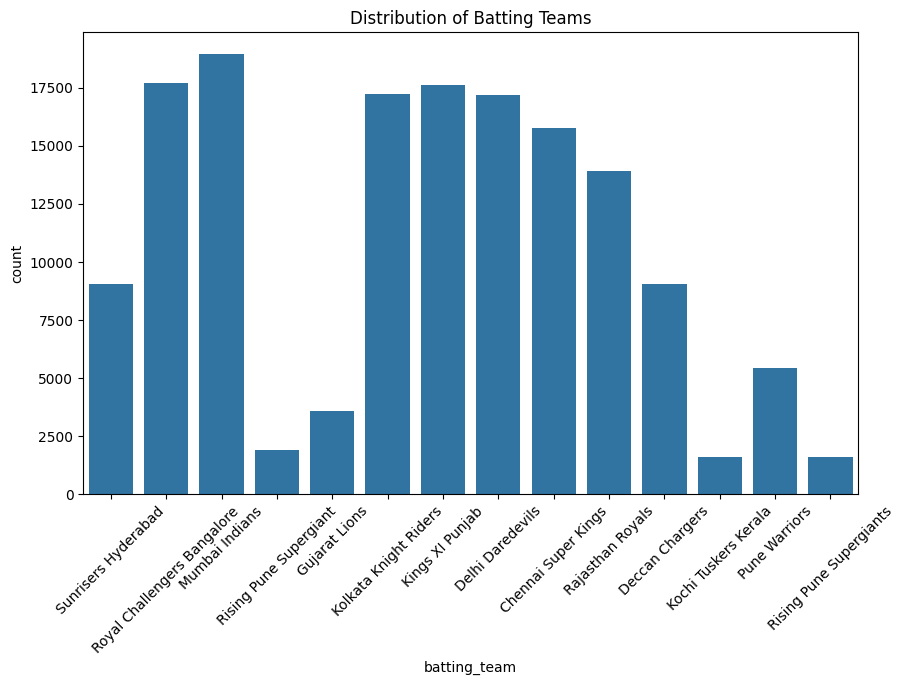

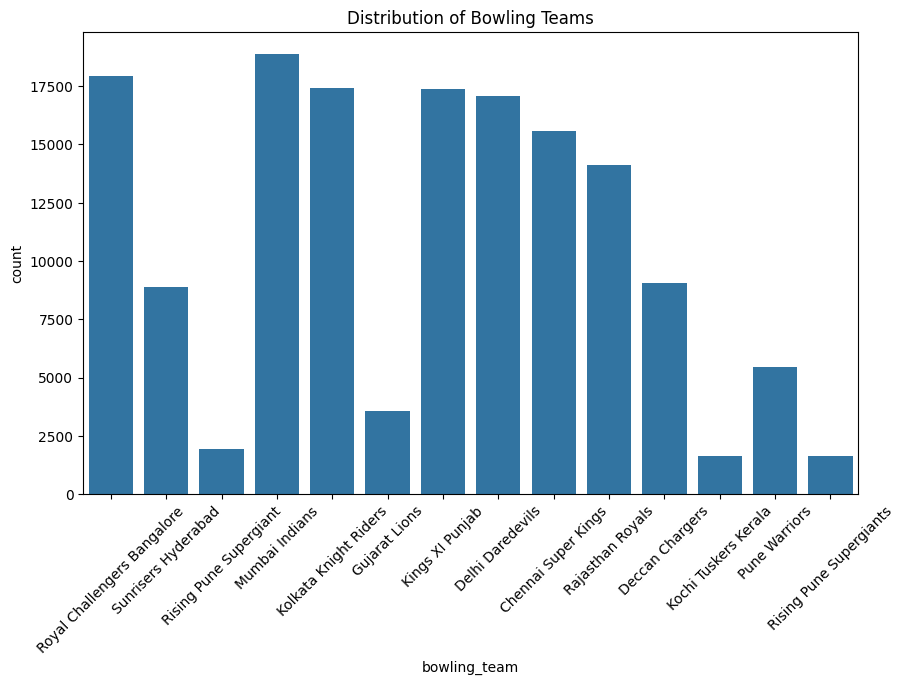

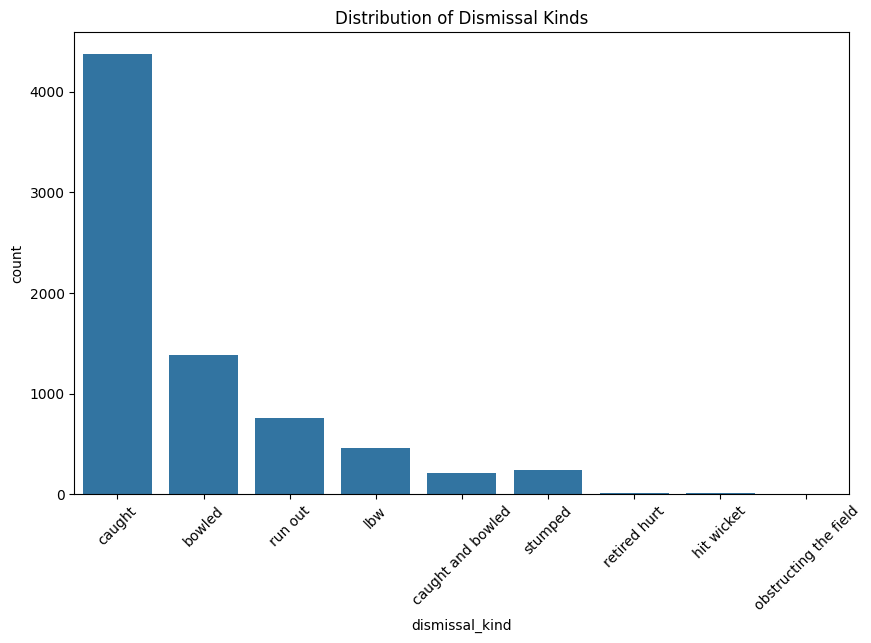

In [10]:
categorical_features = deliveries.select_dtypes(exclude=np.number)
for i, col in enumerate(categorical_features.columns):
  if i<2:
    print(f"Distribution of {col}:")
    print(deliveries[col].value_counts())
    print("-" * 20)
  else:
    break

plt.figure(figsize=(10, 6))
sns.countplot(x='batting_team', data=deliveries)
plt.xticks(rotation=45)
plt.title('Distribution of Batting Teams')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='bowling_team', data=deliveries)
plt.xticks(rotation=45)
plt.title('Distribution of Bowling Teams')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='dismissal_kind', data=deliveries[deliveries['dismissal_kind'] != 'pass'])
plt.xticks(rotation=45)
plt.title('Distribution of Dismissal Kinds')
plt.show()

##Data Exploration and Visualization:

In [11]:
# Summary statistics for numerical columns in both datasets
deliveries_numeric_summary = deliveries.describe()
matches_numeric_summary = matches.describe()

# Unique values in categorical features
deliveries_categorical_counts = deliveries.select_dtypes(include='object').nunique()
matches_categorical_counts = matches.select_dtypes(include='object').nunique()

deliveries_numeric_summary, matches_numeric_summary, deliveries_categorical_counts, matches_categorical_counts


(            match_id         inning           over           ball  \
 count  150460.000000  150460.000000  150460.000000  150460.000000   
 mean      318.281317       1.482188      10.142649       3.616483   
 std       182.955531       0.501768       5.674338       1.807698   
 min         1.000000       1.000000       1.000000       1.000000   
 25%       161.000000       1.000000       5.000000       2.000000   
 50%       319.000000       1.000000      10.000000       4.000000   
 75%       476.000000       2.000000      15.000000       5.000000   
 max       636.000000       4.000000      20.000000       9.000000   
 
        is_super_over      wide_runs       bye_runs    legbye_runs  \
 count  150460.000000  150460.000000  150460.000000  150460.000000   
 mean        0.000538       0.037498       0.004885       0.022232   
 std         0.023196       0.257398       0.114234       0.200104   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         0.000

# Create histograms to visualize the distribution of numerical features.

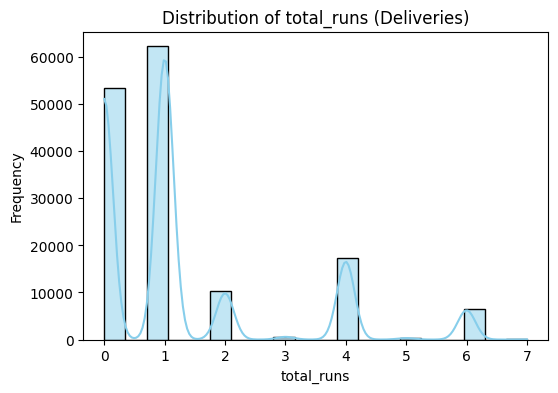

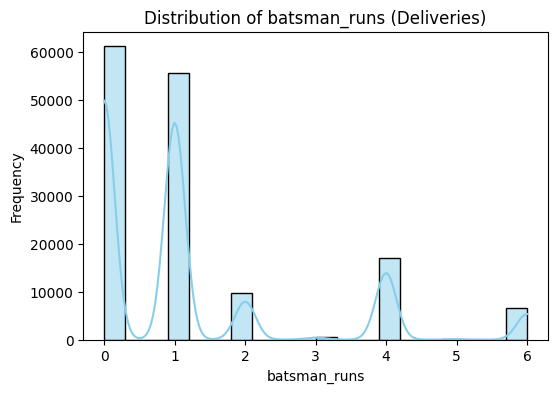

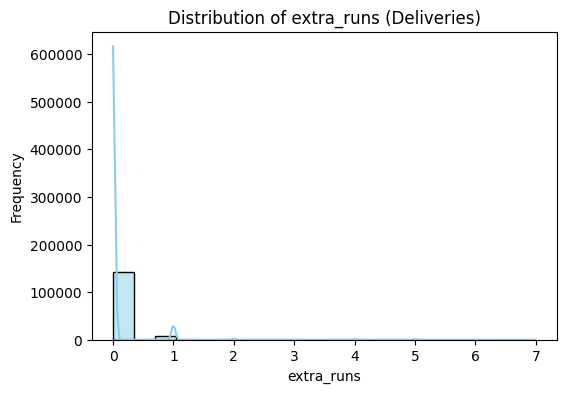

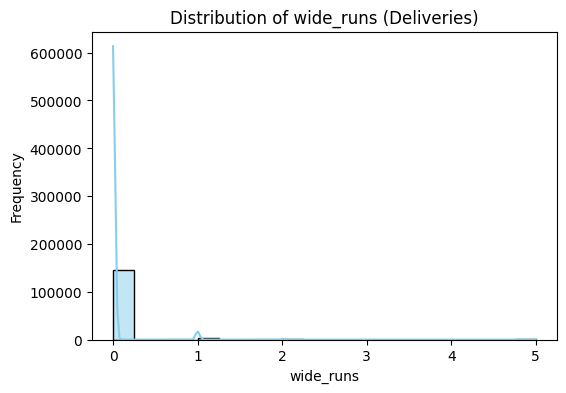

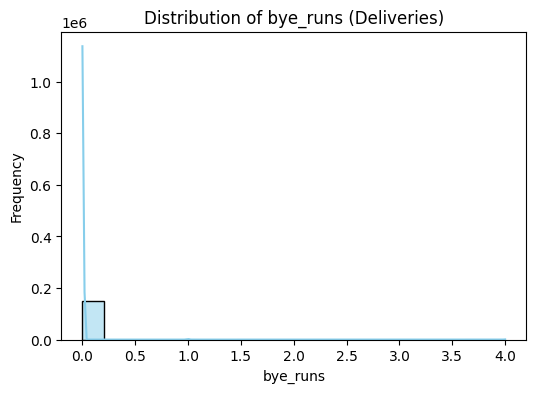

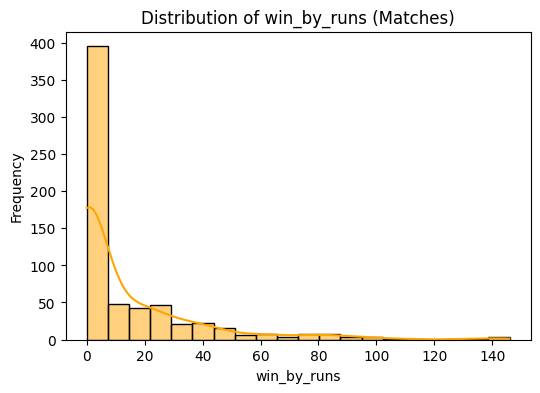

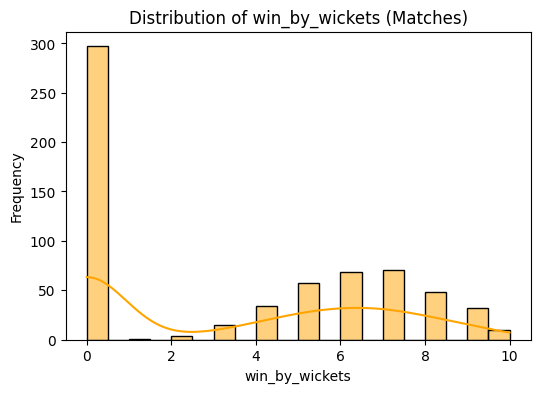

In [12]:
# Numerical features in the deliveries dataset
numerical_columns_deliveries = ['total_runs', 'batsman_runs', 'extra_runs', 'wide_runs', 'bye_runs']
for col in numerical_columns_deliveries:
    plt.figure(figsize=(6, 4))
    sns.histplot(deliveries[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col} (Deliveries)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Numerical features in the matches dataset
numerical_columns_matches = ['win_by_runs', 'win_by_wickets']
for col in numerical_columns_matches:
    plt.figure(figsize=(6, 4))
    sns.histplot(matches[col], kde=True, bins=20, color='orange')
    plt.title(f"Distribution of {col} (Matches)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Visualisations of categorical columns.

as there are not many categorical comumns to visualize. The dismissal trye is the only categorical column to visualize.

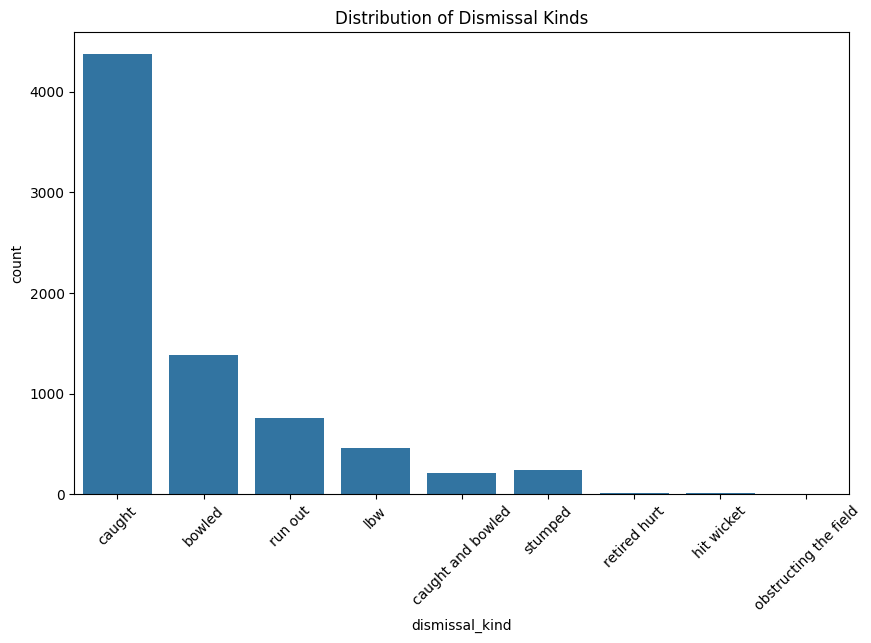

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='dismissal_kind', data=deliveries[deliveries['dismissal_kind']!='pass'])
plt.xticks(rotation=45)
plt.title('Distribution of Dismissal Kinds')
plt.show()

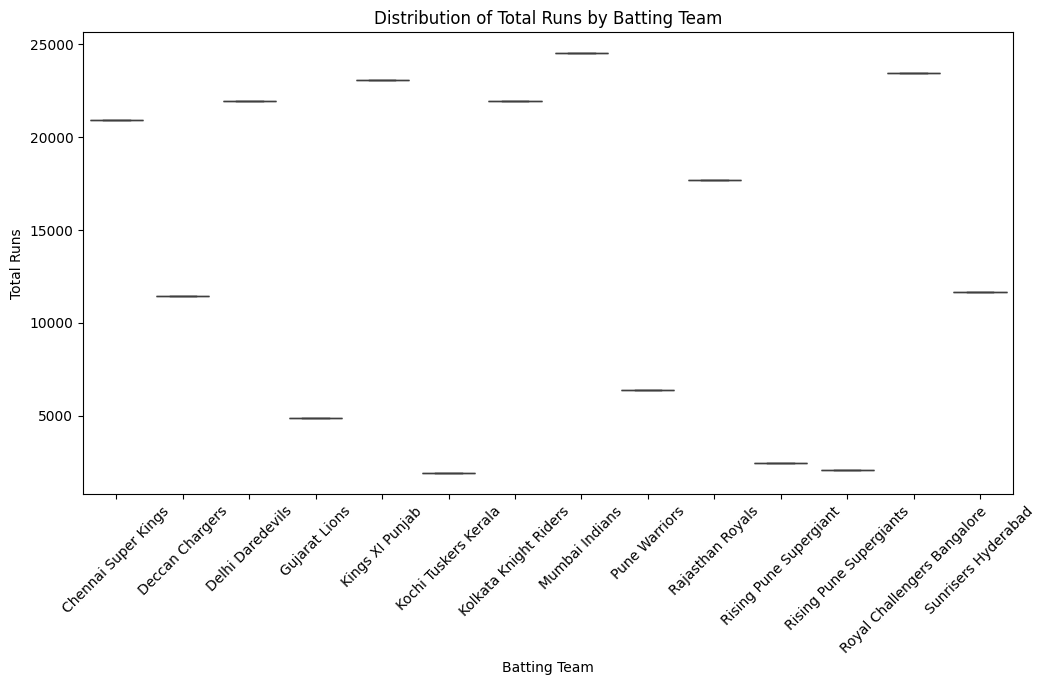

In [14]:
team_total_runs = deliveries.groupby('batting_team')['total_runs'].sum().reset_index()

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='batting_team', y='total_runs', data=team_total_runs)
plt.xticks(rotation=45)
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.title('Distribution of Total Runs by Batting Team')
plt.show()

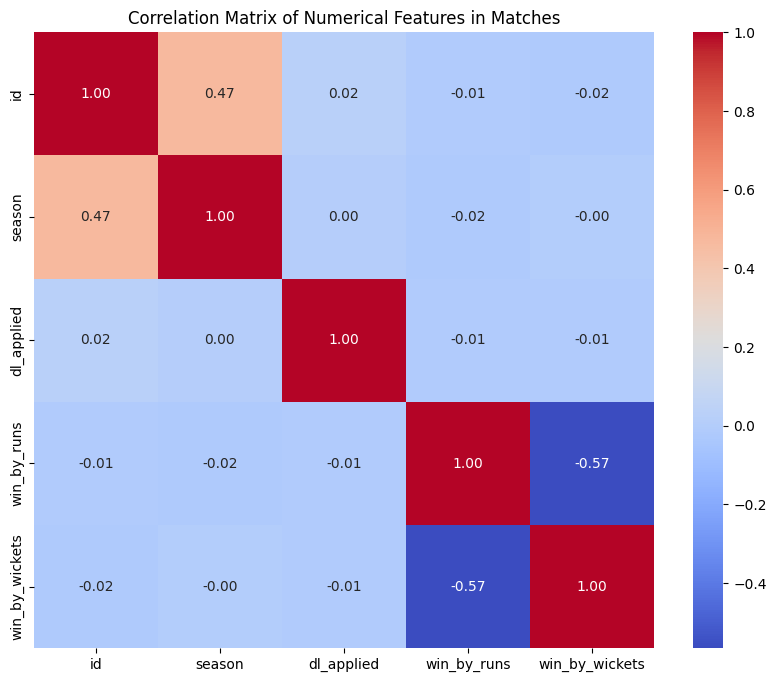

In [15]:
numerical_features = matches.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features in Matches')
plt.show()

In [16]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             636 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           636 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  636 non-null    object
 14  venue            636 non-null    object
 15  umpire1          636 non-null    object
 16  umpire2          636 non-null    object
 17  umpire3          636 non-null    ob

# Pie chart to show win rate of eacch team

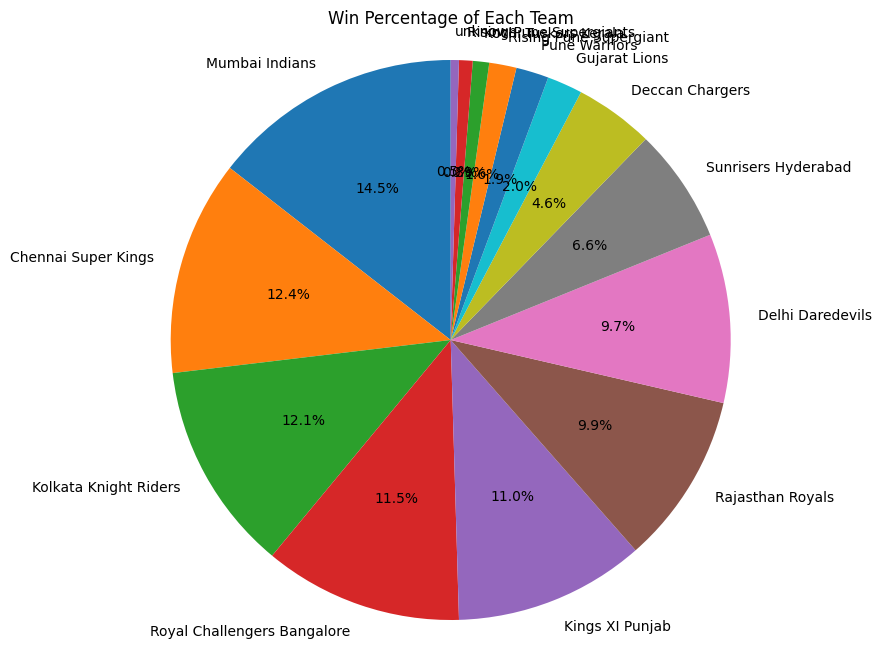

In [17]:
team_wins = matches['winner'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(team_wins, labels=team_wins.index, autopct='%1.1f%%', startangle=90)
plt.title('Win Percentage of Each Team')
plt.axis('equal')
plt.show()

Analysis of run scored in all way


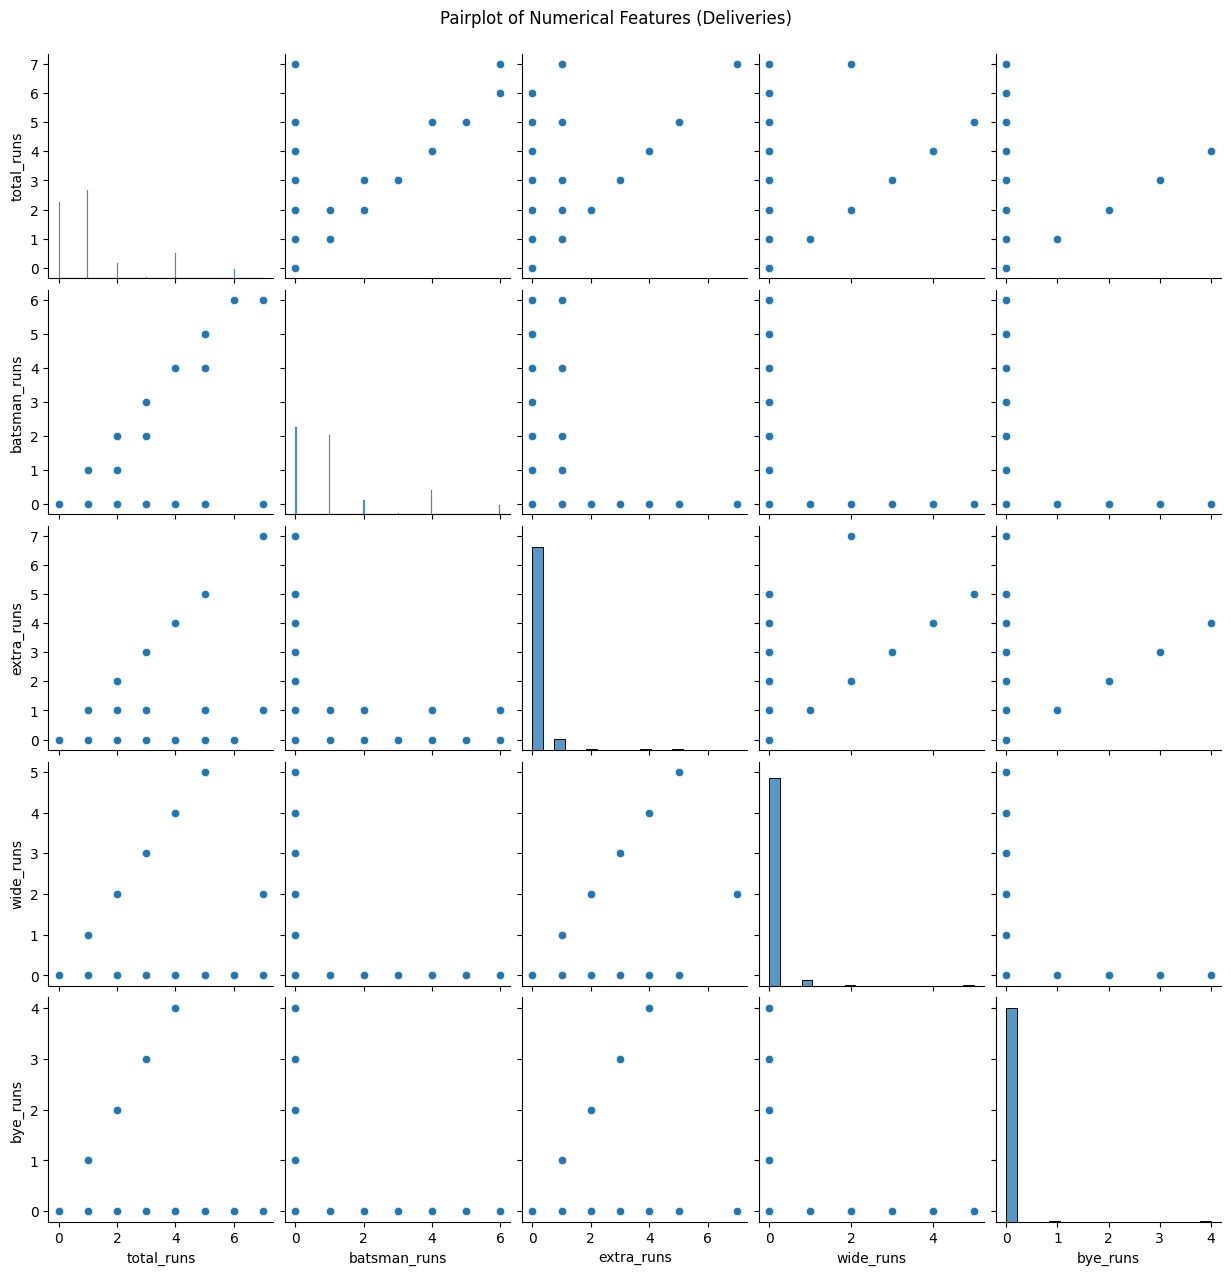

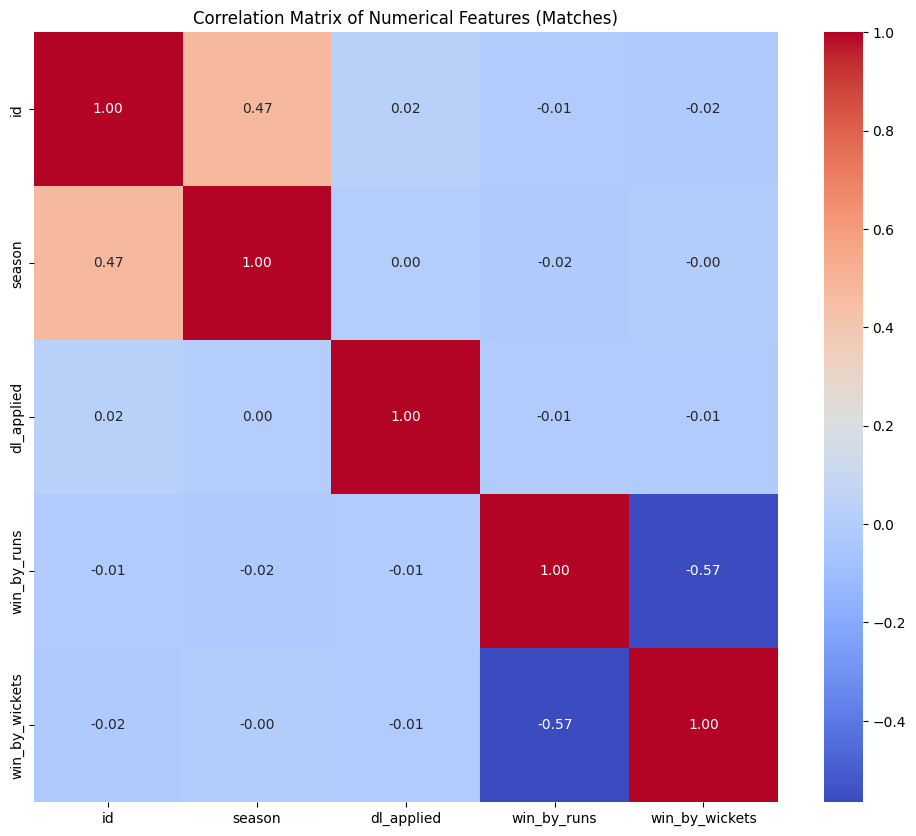

In [19]:

# Pairplot for numerical features in deliveries
print("Analysis of run scored in all way")

numerical_cols_deliveries = ['total_runs', 'batsman_runs', 'extra_runs', 'wide_runs', 'bye_runs']
sns.pairplot(deliveries[numerical_cols_deliveries])
plt.suptitle('Pairplot of Numerical Features (Deliveries)', y=1.02)
plt.show()

# Heatmap for correlation matrix of numerical features in matches
numerical_features_matches = matches.select_dtypes(include=['number'])
correlation_matrix_matches = numerical_features_matches.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_matches, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Matches)')
plt.show()

In [22]:
match_deliveries = pd.merge(deliveries, matches, left_on='match_id', right_on='id')

max_runs_per_match = match_deliveries.groupby(['season', 'match_id', 'batting_team'])['total_runs'].sum().reset_index()

idx = max_runs_per_match.groupby(['season'])['total_runs'].transform(max) == max_runs_per_match['total_runs']
max_runs_per_year = max_runs_per_match[idx].reset_index(drop=True)
max_runs_per_year = max_runs_per_year[['season', 'batting_team', 'total_runs']]
max_runs_per_year.columns = ['Year', 'Team', 'Max_Runs']

# Display the results
max_runs_per_year

<ipython-input-22-7af61fca4132>:5: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = max_runs_per_match.groupby(['season'])['total_runs'].transform(max) == max_runs_per_match['total_runs']


,Year,Team,Max_Runs
0,2008,Chennai Super Kings,240
1,2009,Rajasthan Royals,211
2,2010,Chennai Super Kings,246
3,2011,Kings XI Punjab,232
4,2012,Chennai Super Kings,222
5,2013,Royal Challengers Bangalore,263
6,2014,Kings XI Punjab,231
7,2015,Royal Challengers Bangalore,235
8,2016,Royal Challengers Bangalore,248
9,2017,Kings XI Punjab,230


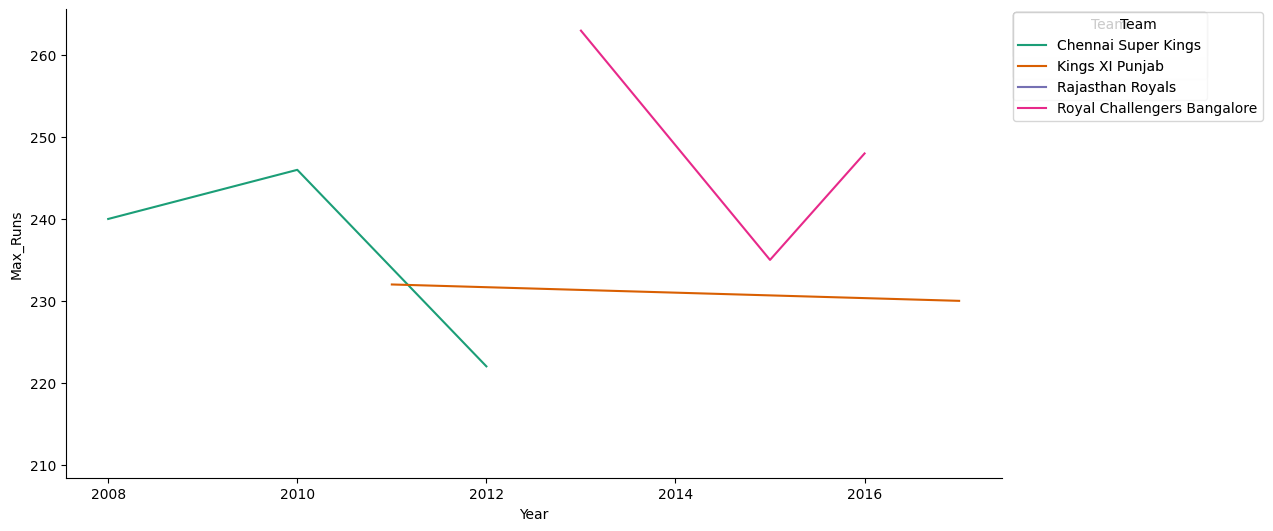

In [24]:
# Year vs Max_Runs

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Max_Runs']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = max_runs_per_year.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Team')):
  _plot_series(series, series_name, i)
  fig.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Max_Runs')

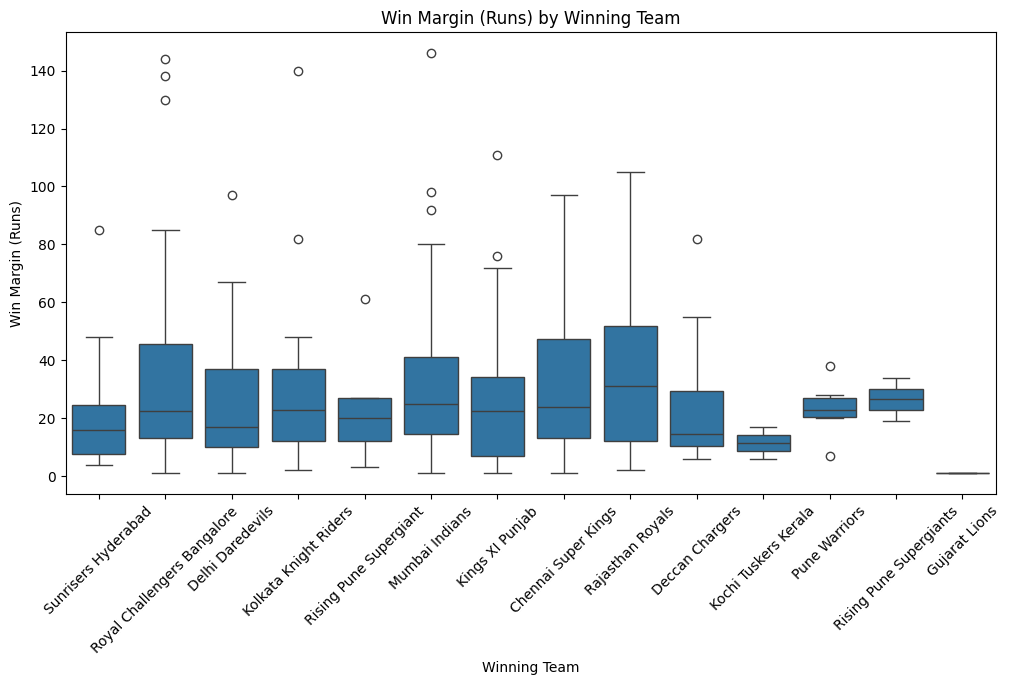


Average Win Margin by Runs:
winner
Royal Challengers Bangalore    39.866667
Rajasthan Royals               35.695652
Chennai Super Kings            34.500000
Mumbai Indians                 32.595745
Kolkata Knight Riders          28.935484
Delhi Daredevils               27.190476
Kings XI Punjab                26.937500
Rising Pune Supergiants        26.500000
Rising Pune Supergiant         24.600000
Deccan Chargers                23.388889
Pune Warriors                  23.166667
Sunrisers Hyderabad            20.695652
Kochi Tuskers Kerala           11.500000
Gujarat Lions                   1.000000
Name: win_by_runs, dtype: float64

Teams with Consistently High Win Margins (>20 runs):


,win_by_runs
winner,
Royal Challengers Bangalore,39.866667
Rajasthan Royals,35.695652
Chennai Super Kings,34.500000
Mumbai Indians,32.595745
Kolkata Knight Riders,28.935484
Delhi Daredevils,27.190476
Kings XI Punjab,26.937500
Rising Pune Supergiants,26.500000
Rising Pune Supergiant,24.600000


In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='winner', y='win_by_runs', data=matches[matches['win_by_runs'] > 0])
plt.xticks(rotation=45)
plt.title('Win Margin (Runs) by Winning Team')
plt.xlabel('Winning Team')
plt.ylabel('Win Margin (Runs)')
plt.show()

# Average win margin by runs for each team
avg_win_margin = matches[matches['win_by_runs'] > 0].groupby('winner')['win_by_runs'].mean().sort_values(ascending=False)

print("\nAverage Win Margin by Runs:")
print(avg_win_margin)x

# Identify teams with consistently high win margins
top_performers = avg_win_margin[avg_win_margin>20]
print("\nTeams with Consistently High Win Margins (>20 runs):")
top_performers

In [25]:
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
top_batsmen = batsman_runs.sort_values(by='batsman_runs', ascending=False).head(10)
print("Top 10 Batsmen by Total Runs:")
print(top_batsmen)

bowler_wickets = deliveries[deliveries['dismissal_kind'] != 'pass'].groupby('bowler')['dismissal_kind'].count().reset_index()
bowler_wickets.rename(columns={'dismissal_kind': 'wickets'}, inplace=True)
top_bowlers = bowler_wickets.sort_values(by='wickets', ascending=False).head(10)
# Display the top 10 bowlers
print("\nTop 10 Bowlers by Total Wickets:")
top_bowlers

Top 10 Batsmen by Total Runs:
            batsman  batsman_runs
374        SK Raina          4548
431         V Kohli          4423
323       RG Sharma          4207
137       G Gambhir          4132
103       DA Warner          4014
340      RV Uthappa          3778
85         CH Gayle          3651
347        S Dhawan          3561
259        MS Dhoni          3560
22   AB de Villiers          3486

Top 10 Bowlers by Total Wickets:


,bowler,wickets
259,SL Malinga,170
5,A Mishra,142
80,DJ Bravo,137
107,Harbhajan Singh,136
204,PP Chawla,133
219,R Vinay Kumar,125
7,A Nehra,121
313,Z Khan,119
46,B Kumar,117
209,R Ashwin,110


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# Insights and Conclusion:

# Numerical Features:
Deliveries Dataset:

Total Runs: Most deliveries result in 1 or 0 runs, which aligns with typical cricket scoring patterns.
Batsman Runs: Similarly, the majority of runs scored by batsmen are singles or dots.
Extras: Rare events, as wide_runs, bye_runs, and legbye_runs are predominantly zero.
Super Overs: Minimal occurrence, as seen from the limited entries with is_super_over = 1.

Matches Dataset:

Winning Margins:
Most victories are achieved by small margins (win_by_runs peaks at low values).
Some matches exhibit large margins, e.g., 146 runs, indicating dominant performances.
Many teams win by the maximum of 10 wickets, showcasing strong chases.
Duckworth-Lewis Adjustments: Very few matches required dl_applied, indicating stable weather conditions for most games.

Categorical Features:
Deliveries Dataset:

Teams like Mumbai Indians and Chennai Super Kings appear frequently in the data, reflecting their active participation in tournaments.
Caught dismissals dominate the dismissal_kind, followed by bowled and run-out, showing common ways wickets fall in matches.
Matches Dataset:

Cities like Mumbai, Bangalore, and Delhi host the most games.
Teams like Mumbai Indians have the highest win frequency, confirming their strong track record in tournaments.

Overall Patterns:
Player Contributions: Frequent dots and singles suggest a focus on strike rotation, with occasional boundaries contributing to totals.
Venue Impact: The frequency of matches in specific cities may influence team performances and strategies due to pitch and weather conditions.
Dismissal Trends: Bowlers often rely on field placements (caught) and precise bowling (bowled) for wickets.

# Questions

Q1. How are total runs distributed per over across all matches? Are there specific overs with higher or lower scoring tendencies?

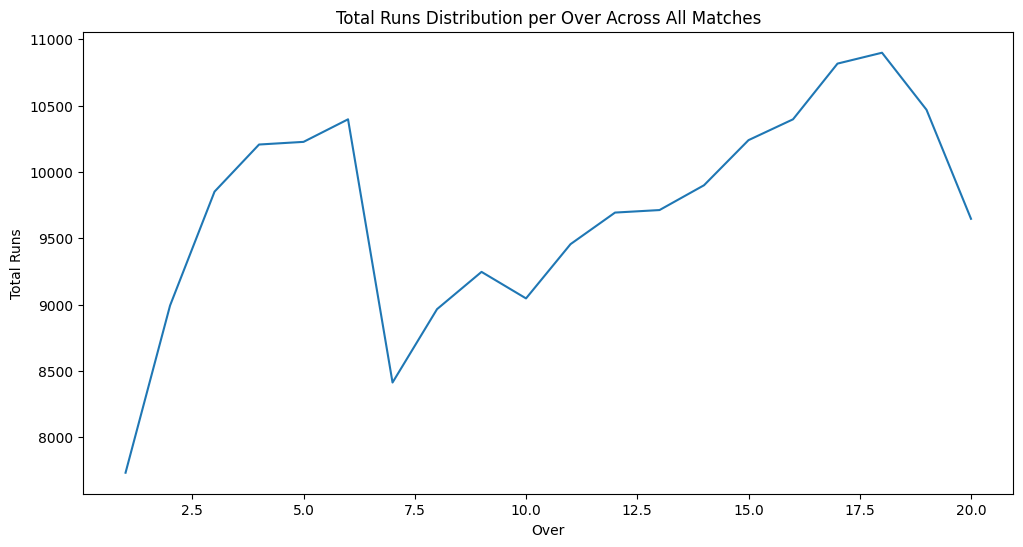

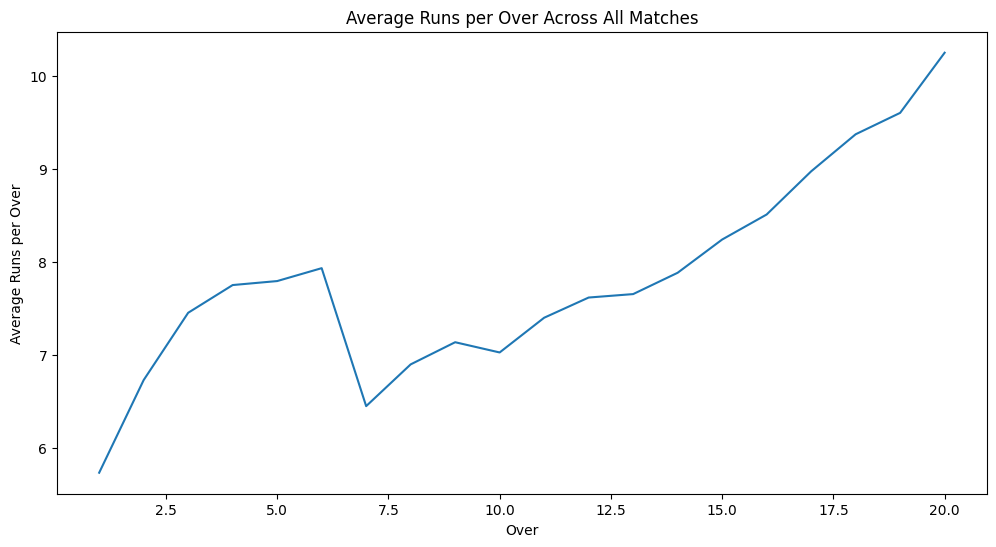

Overs with highest average runs:
over
20    10.246415
19     9.600183
18     9.370110
17     8.971800
16     8.508183
Name: avg_runs_per_over, dtype: float64

Overs with lowest average runs:


,avg_runs_per_over
over,
1,5.733811
7,6.449214
2,6.729608
8,6.897807
10,7.025887


In [28]:
runs_per_over = match_deliveries.groupby('over')['total_runs'].sum()

# Plotting the distribution of total runs per over
plt.figure(figsize=(12, 6))
sns.lineplot(x=runs_per_over.index, y=runs_per_over.values)
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.title('Total Runs Distribution per Over Across All Matches')
plt.show()

over_data = match_deliveries.groupby('over')['total_runs'].agg(['sum', 'count'])
over_data.rename(columns={'sum': 'total_runs', 'count': 'balls_bowled'}, inplace=True)

# Average runs per over
over_data['avg_runs_per_over'] = over_data['total_runs'] / (over_data['balls_bowled'] / 6)  # Divide by 6 to get runs per over

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=over_data.index, y=over_data['avg_runs_per_over'])
plt.xlabel('Over')
plt.ylabel('Average Runs per Over')
plt.title('Average Runs per Over Across All Matches')
plt.show()


highest_avg_overs = over_data['avg_runs_per_over'].nlargest(5)
lowest_avg_overs = over_data['avg_runs_per_over'].nsmallest(5)

print("Overs with highest average runs:")
print(highest_avg_overs)
print("\nOvers with lowest average runs:")
lowest_avg_overs

# How frequently do different batting teams hit boundaries (fours and sixes)? Do some teams rely more heavily on boundaries for scoring?


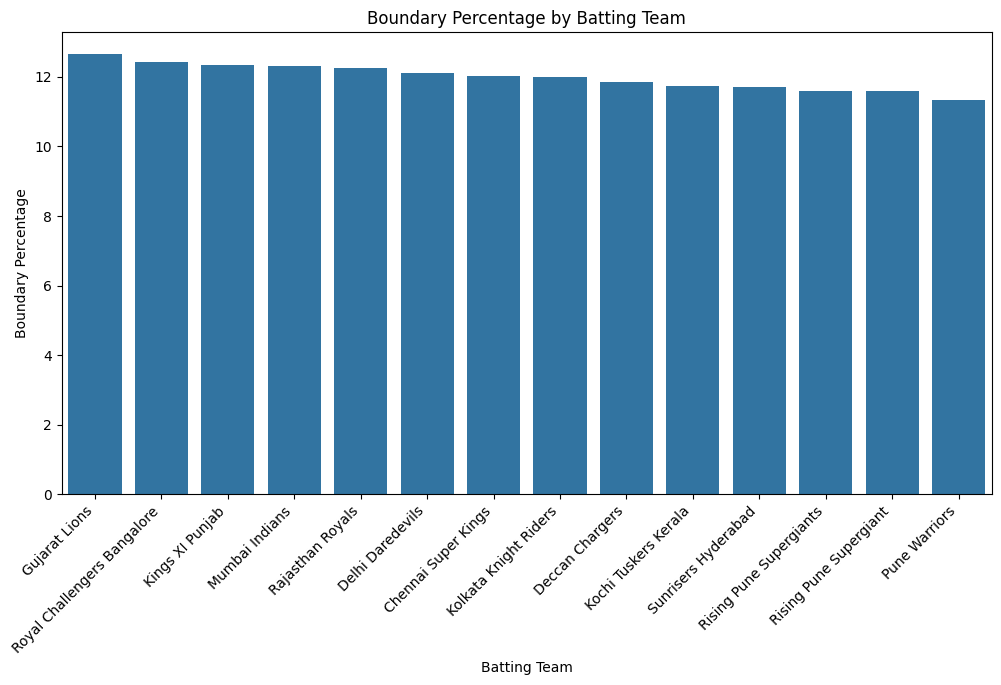

,batting_team,boundary_count,total_runs,boundary_percentage
3,Gujarat Lions,615,4862,12.649116
12,Royal Challengers Bangalore,2913,23436,12.429595
4,Kings XI Punjab,2845,23068,12.333102
7,Mumbai Indians,3021,24521,12.320052
9,Rajasthan Royals,2168,17703,12.246512
2,Delhi Daredevils,2656,21953,12.098574
0,Chennai Super Kings,2512,20899,12.019714
6,Kolkata Knight Riders,2637,21965,12.005463
1,Deccan Chargers,1357,11463,11.838088
5,Kochi Tuskers Kerala,223,1901,11.730668


In [29]:
boundaries = match_deliveries[match_deliveries['batsman_runs'].isin([4, 6])]
boundary_counts = boundaries.groupby('batting_team')['batsman_runs'].count().reset_index()
boundary_counts.rename(columns={'batsman_runs': 'boundary_count'}, inplace=True)

total_runs_per_team = match_deliveries.groupby('batting_team')['total_runs'].sum().reset_index()

team_stats = pd.merge(boundary_counts, total_runs_per_team, on='batting_team')

team_stats['boundary_percentage'] = (team_stats['boundary_count']/team_stats['total_runs']) * 100


team_stats = team_stats.sort_values('boundary_percentage', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='boundary_percentage', data=team_stats)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Batting Team')
plt.ylabel('Boundary Percentage')
plt.title('Boundary Percentage by Batting Team')
plt.show()

team_stats

# Is there a difference in the distribution and types of extra runs conceded by various bowling teams?

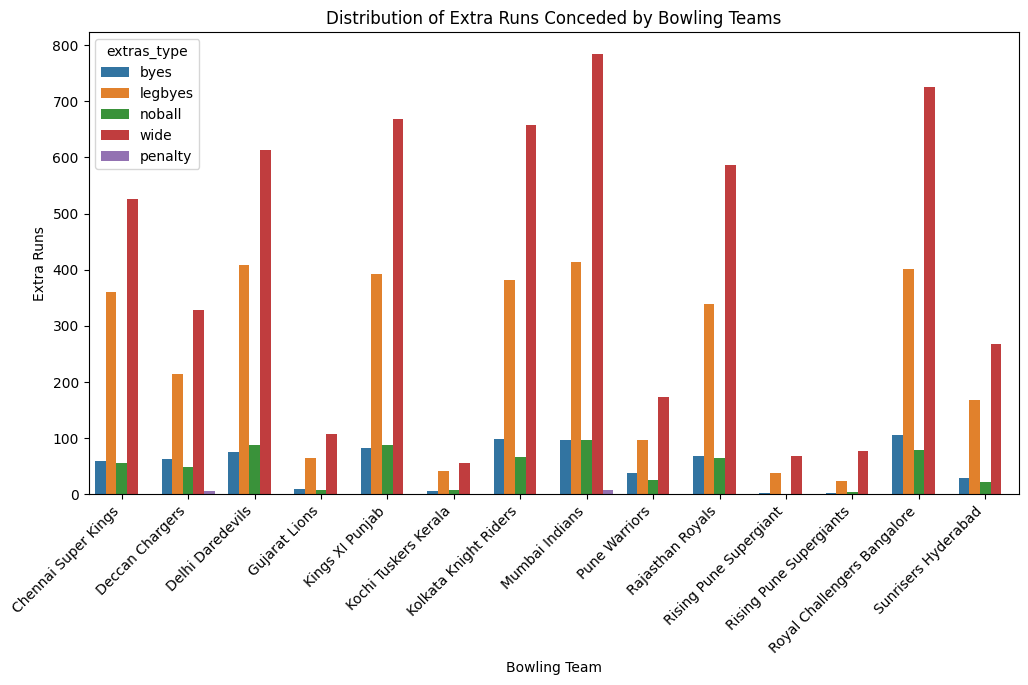

,bowling_team,extras_type,extra_runs
0,Chennai Super Kings,byes,59
1,Chennai Super Kings,legbyes,361
2,Chennai Super Kings,noball,56
3,Chennai Super Kings,wide,526
4,Deccan Chargers,byes,62
5,Deccan Chargers,legbyes,215
6,Deccan Chargers,noball,49
7,Deccan Chargers,penalty,5
8,Deccan Chargers,wide,328
9,Delhi Daredevils,byes,76


In [37]:
match_deliveries['extras_type'] = pd.NA
match_deliveries.loc[match_deliveries['wide_runs'] > 0, 'extras_type'] = 'wide'
match_deliveries.loc[match_deliveries['noball_runs'] > 0, 'extras_type'] = 'noball'
match_deliveries.loc[match_deliveries['bye_runs'] > 0, 'extras_type'] = 'byes'
match_deliveries.loc[match_deliveries['legbye_runs'] > 0, 'extras_type'] = 'legbyes'
match_deliveries.loc[match_deliveries['penalty_runs'] > 0, 'extras_type'] = 'penalty'


extra_runs_by_team = match_deliveries.groupby(['bowling_team', 'extras_type'])['extra_runs'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='bowling_team', y='extra_runs', hue='extras_type', data=extra_runs_by_team)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bowling Team')
plt.ylabel('Extra Runs')
plt.title('Distribution of Extra Runs Conceded by Bowling Teams')
plt.show()

extra_runs_by_team

# How do run rates change across different phases of the innings (e.g., powerplay, middle overs, death overs) for different teams?

<ipython-input-38-e6df9f97087f>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_run_rates = match_deliveries.groupby('batting_team').apply(lambda x: pd.Series({


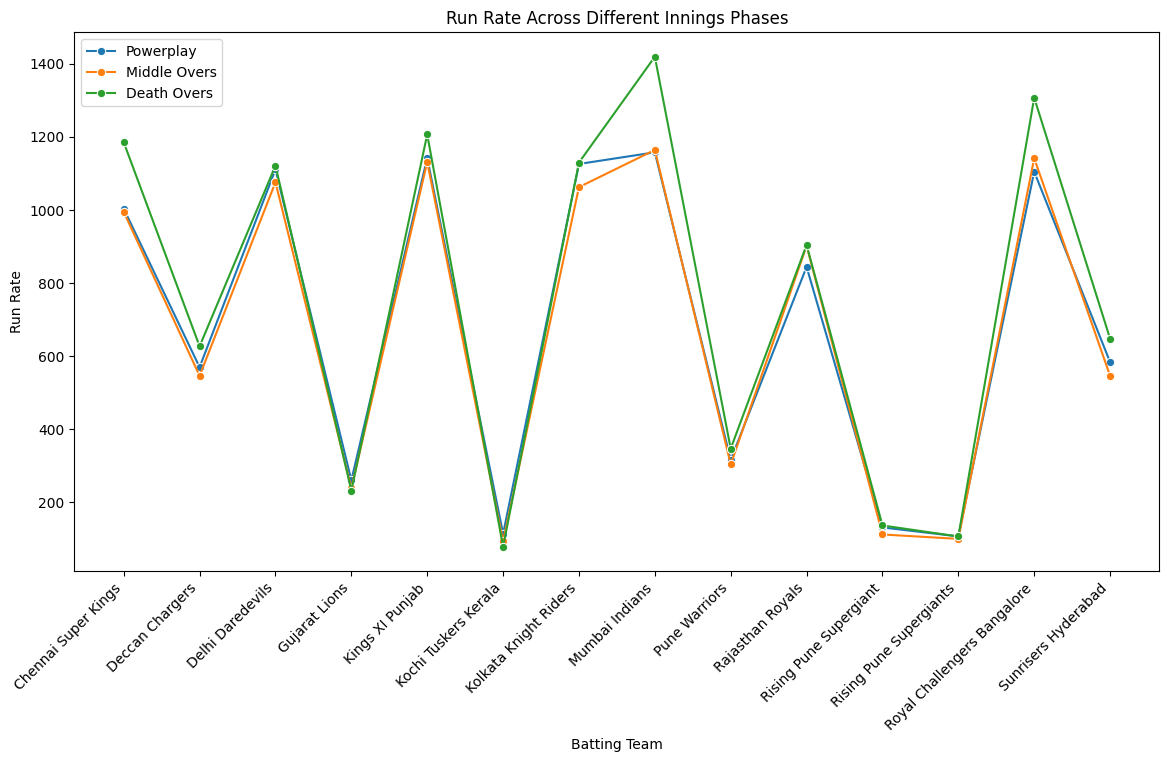

,batting_team,powerplay_run_rate,middle_overs_run_rate,death_overs_run_rate
0,Chennai Super Kings,1003.500000,994.666667,1185.2
1,Deccan Chargers,569.500000,545.888889,626.6
2,Delhi Daredevils,1110.833333,1075.777778,1121.2
3,Gujarat Lions,259.833333,238.222222,231.8
4,Kings XI Punjab,1142.333333,1131.222222,1206.6
5,Kochi Tuskers Kerala,113.333333,92.333333,78.0
6,Kolkata Knight Riders,1125.833333,1062.444444,1129.6
7,Mumbai Indians,1157.666667,1164.222222,1419.4
8,Pune Warriors,315.833333,303.333333,346.6
9,Rajasthan Royals,844.166667,902.000000,904.0


In [38]:
powerplay_overs = range(1, 7)
middle_overs = range(7, 16)
death_overs = range(16, 21)

def calculate_run_rate(df, overs):
  return df[df['over'].isin(overs)]['total_runs'].sum()/len(overs)


team_run_rates = match_deliveries.groupby('batting_team').apply(lambda x: pd.Series({
    'powerplay_run_rate': calculate_run_rate(x, powerplay_overs),
    'middle_overs_run_rate': calculate_run_rate(x, middle_overs),
    'death_overs_run_rate': calculate_run_rate(x, death_overs)
})).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=team_run_rates, x='batting_team', y='powerplay_run_rate', marker='o', label='Powerplay')
sns.lineplot(data=team_run_rates, x='batting_team', y='middle_overs_run_rate', marker='o', label='Middle Overs')
sns.lineplot(data=team_run_rates, x='batting_team', y='death_overs_run_rate', marker='o', label='Death Overs')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Batting Team')
plt.ylabel('Run Rate')
plt.title('Run Rate Across Different Innings Phases')
plt.legend()
plt.show()


team_run_rates

# How do scoring patterns and run rates differ in super overs compared to regular overs?

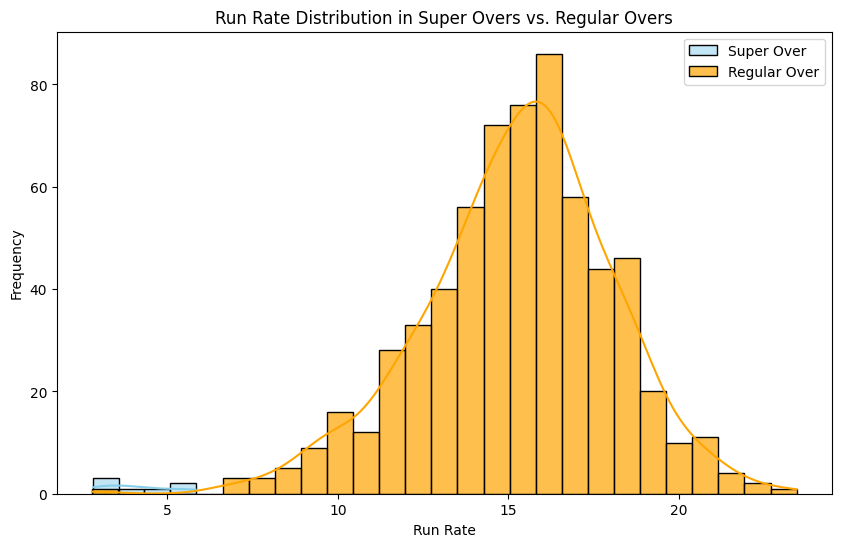

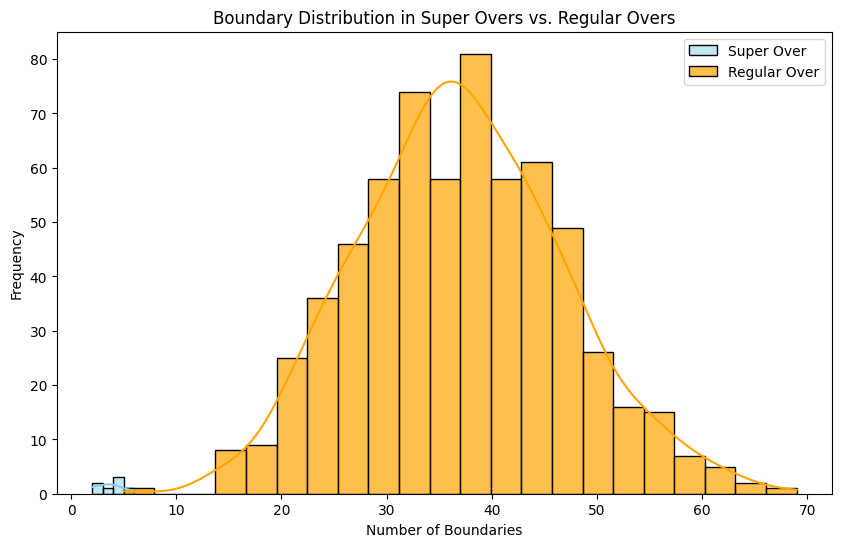

Descriptive statistics for Super Over Run Rate:
count    7.000000
mean     4.119048
std      1.157561
min      2.833333
25%      3.333333
50%      3.666667
75%      4.916667
max      5.833333
Name: total_runs, dtype: float64

Descriptive statistics for Regular Over Run Rate:
count    636.000000
mean      15.262657
std        2.769664
min        2.800000
25%       13.650000
50%       15.550000
75%       17.012500
max       23.450000
Name: total_runs, dtype: float64


In [39]:
super_overs = match_deliveries[match_deliveries['is_super_over'] == 1]
regular_overs = match_deliveries[match_deliveries['is_super_over'] == 0]

super_over_run_rate = super_overs.groupby('match_id')['total_runs'].sum() / 6
regular_over_run_rate = regular_overs.groupby('match_id')['total_runs'].sum()/20

# Plotting run rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(super_over_run_rate, kde=True, label='Super Over', color='skyblue')
sns.histplot(regular_over_run_rate, kde=True, label='Regular Over', color='orange', alpha=0.7)  # Adjust alpha for visibility
plt.xlabel('Run Rate')
plt.ylabel('Frequency')
plt.title('Run Rate Distribution in Super Overs vs. Regular Overs')
plt.legend()
plt.show()

super_over_boundaries = super_overs[super_overs['batsman_runs'].isin([4, 6])].groupby('match_id')['batsman_runs'].count()
regular_over_boundaries = regular_overs[regular_overs['batsman_runs'].isin([4, 6])].groupby('match_id')['batsman_runs'].count()

plt.figure(figsize=(10, 6))
sns.histplot(super_over_boundaries, kde=True, label='Super Over', color='skyblue')
sns.histplot(regular_over_boundaries, kde=True, label='Regular Over', color='orange', alpha=0.7)
plt.xlabel('Number of Boundaries')
plt.ylabel('Frequency')
plt.title('Boundary Distribution in Super Overs vs. Regular Overs')
plt.legend()
plt.show()

print("Descriptive statistics for Super Over Run Rate:")
print(super_over_run_rate.describe())
print("\nDescriptive statistics for Regular Over Run Rate:")
print(regular_over_run_rate.describe())

#What is the distribution of different dismissal types (caught, bowled, LBW, etc.)? Are there any trends in how batsmen are getting out?

dismissal_kind
caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: count, dtype: int64


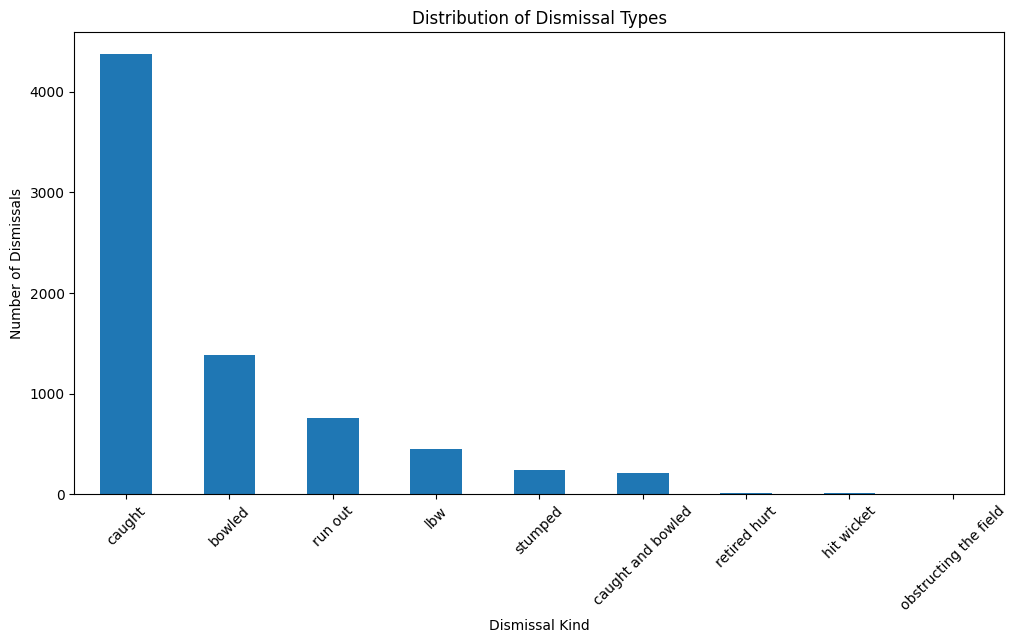

In [40]:
dismissal_counts = deliveries[deliveries['dismissal_kind']!='pass']['dismissal_kind'].value_counts()
print(dismissal_counts)

plt.figure(figsize=(12, 6))
dismissal_counts.plot(kind='bar')
plt.title('Distribution of Dismissal Types')
plt.xlabel('Dismissal Kind')
plt.ylabel('Number of Dismissals')
plt.xticks(rotation=45)
plt.show()

# Which bowlers have the best performance in terms of wickets taken, economy rate, and bowling strike rate? What are their preferred dismissal methods?

In [49]:
bowler_wickets = deliveries[deliveries['dismissal_kind'] != 'pass'].groupby('bowler')['dismissal_kind'].count().reset_index()
bowler_wickets.rename(columns={'dismissal_kind': 'wickets'}, inplace=True)
bowler_runs= deliveries.groupby('bowler')['total_runs'].sum().reset_index()

bowler_balls = deliveries.groupby('bowler')['ball'].count().reset_index()

bowler_stats = pd.merge(bowler_wickets, bowler_balls, on='bowler')

bowler_stats['economy_rate'] = (bowler_runs['total_runs'] / bowler_stats['ball']) * 6
bowler_stats['bowling_strike_rate'] = bowler_stats['ball'] / bowler_stats['wickets']

min_wickets = 50
top_bowlers = bowler_stats[bowler_stats['wickets'] >= min_wickets]

top_bowlers = top_bowlers.sort_values(by=['wickets', 'economy_rate', 'bowling_strike_rate'], ascending=[False, True, True])

# Display the top bowlers
print("\nTop Bowlers by Wickets, Economy, and Strike Rate (Minimum 50 Wickets):")
print(top_bowlers.head(10))

dismissal_methods = deliveries[deliveries['dismissal_kind'] != 'pass']
top_bowler_dismissals = dismissal_methods[dismissal_methods['bowler'].isin(top_bowlers['bowler'])]
dismissal_distribution = top_bowler_dismissals.groupby(['bowler', 'dismissal_kind'])['dismissal_kind'].count().unstack(fill_value=0)

print("\nDismissal Methods for Top Bowlers:")
dismissal_distribution


Top Bowlers by Wickets, Economy, and Strike Rate (Minimum 50 Wickets):
              bowler  wickets  ball  economy_rate  bowling_strike_rate
259       SL Malinga      170  2694      0.476615            15.847059
5           A Mishra      142  2703      7.336293            19.035211
80          DJ Bravo      137  2110      0.870142            15.401460
107  Harbhajan Singh      136  2989      1.174306            21.977941
204        PP Chawla      133  2594      0.164225            19.503759
219    R Vinay Kumar      125  2161      2.226747            17.288000
7            A Nehra      121  1974      7.711246            16.314050
313           Z Khan      119  2276      2.960457            19.126050
46           B Kumar      117  2054      2.065239            17.555556
209         R Ashwin      110  2359      0.007630            21.445455

Dismissal Methods for Top Bowlers:


dismissal_kind,bowled,caught,caught and bowled,hit wicket,lbw,retired hurt,run out,stumped
bowler,,,,,,,,
A Mishra,21,74,3,0,13,0,8,23
A Nehra,23,76,2,0,5,0,15,0
AB Dinda,14,52,0,0,3,0,13,0
AR Patel,20,27,3,1,0,0,3,7
B Kumar,33,65,5,0,7,0,6,1
CH Morris,16,34,1,0,3,0,8,0
DJ Bravo,18,90,8,0,6,0,15,0
DS Kulkarni,9,61,4,0,2,0,5,0
DW Steyn,25,58,2,1,6,0,8,0


# Analyze the win-loss trends of each team across different seasons. Are there teams that have shown consistent improvement or decline?

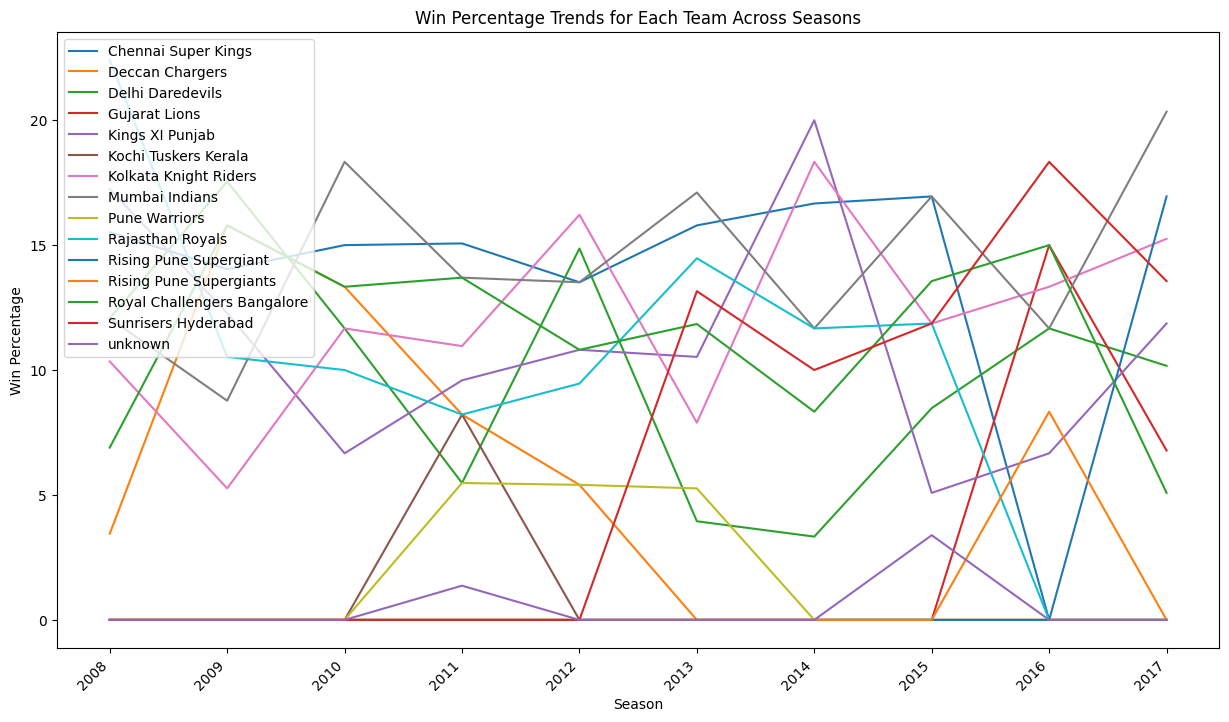

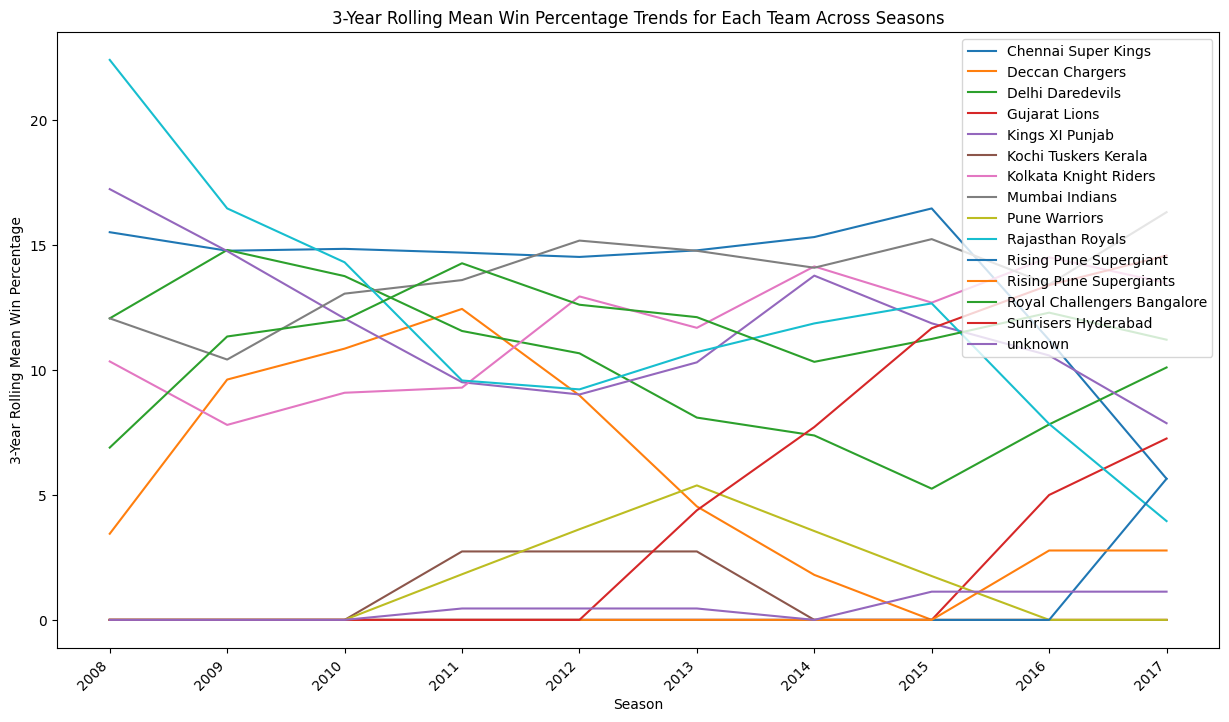

In [51]:
season_winner = matches.groupby(['season', 'winner'])['winner'].count().reset_index(name='wins')

team_wins_by_season = season_winner.pivot(index='season', columns='winner', values='wins').fillna(0)

team_win_percentages = team_wins_by_season.div(team_wins_by_season.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
for team in team_win_percentages.columns:
    plt.plot(team_win_percentages.index, team_win_percentages[team], label=team)
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.title('Win Percentage Trends for Each Team Across Seasons')
plt.legend()
plt.xticks(team_win_percentages.index, rotation=45, ha="right")
plt.show()

rolling_mean_win_percentage = team_win_percentages.rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(15, 8))
for team in rolling_mean_win_percentage.columns:
  plt.plot(rolling_mean_win_percentage.index, rolling_mean_win_percentage[team], label=team)

plt.xlabel('Season')
plt.ylabel('3-Year Rolling Mean Win Percentage')
plt.title('3-Year Rolling Mean Win Percentage Trends for Each Team Across Seasons')
plt.legend()
plt.xticks(rolling_mean_win_percentage.index, rotation=45, ha="right")
plt.show()


In [52]:
win_percentage_diff = team_win_percentages.iloc[-1] - team_win_percentages.iloc[0]

# Sort the teams based on this difference
sorted_win_percentage_diff = win_percentage_diff.sort_values(ascending=False)

sorted_win_percentage_diff

,0
winner,
Rising Pune Supergiant,16.949153
Sunrisers Hyderabad,13.559322
Mumbai Indians,8.270018
Gujarat Lions,6.779661
Kolkata Knight Riders,4.909410
Kochi Tuskers Kerala,0.000000
Pune Warriors,0.000000
Rising Pune Supergiants,0.000000
unknown,0.000000


# Which fielders contribute the most to dismissals through catches and run-outs?

            fielder dismissal_kind  counts
282      KD Karthik         caught      88
550        SK Raina         caught      83
26   AB de Villiers         caught      81
384        MS Dhoni         caught      76
506      RV Uthappa         caught      75
484       RG Sharma         caught      70
412         NV Ojha         caught      65
274      KA Pollard         caught      64
428        PA Patel         caught      60
636         V Kohli         caught      60


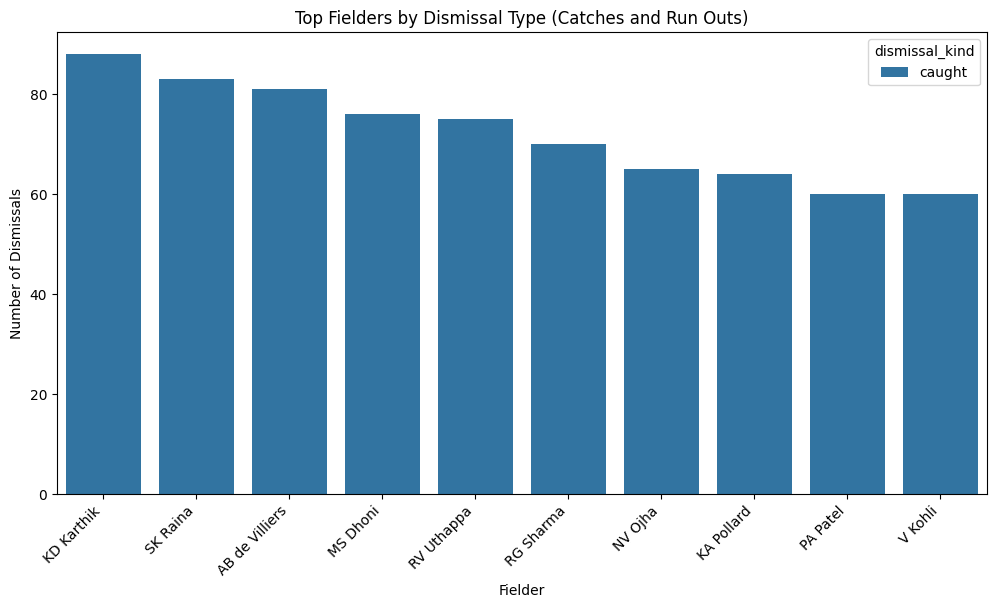

In [53]:
fielder_dismissals = match_deliveries[match_deliveries['dismissal_kind'].isin(['caught', 'run out'])] \
    .groupby(['fielder', 'dismissal_kind'])['dismissal_kind'].count().reset_index(name='counts')

top_fielders = fielder_dismissals.sort_values('counts', ascending=False).head(10)

print(top_fielders)

plt.figure(figsize=(12, 6))
sns.barplot(x='fielder', y='counts', hue='dismissal_kind', data=top_fielders)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fielder')
plt.ylabel('Number of Dismissals')
plt.title('Top Fielders by Dismissal Type (Catches and Run Outs)')
plt.show()

# How are wickets distributed across overs in the matches? Are there specific overs where bowlers tend to be more successful?

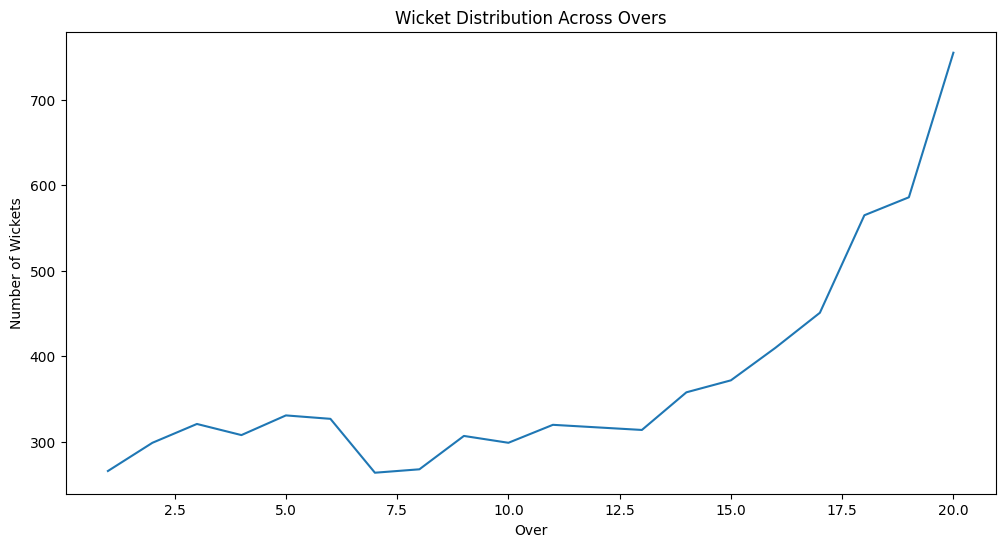

Overs with the highest number of wickets:
    over  wickets
19    20      755
18    19      586
17    18      565
16    17      451
15    16      410

Overs with the lowest number of wickets:


,over,wickets
6,7,264
0,1,266
7,8,268
1,2,299
9,10,299


In [54]:
wickets_per_over = match_deliveries[match_deliveries['dismissal_kind'] != 'pass'].groupby('over')['dismissal_kind'].count().reset_index(name='wickets')

# Plot the distribution of wickets per over
plt.figure(figsize=(12, 6))
sns.lineplot(x='over', y='wickets', data=wickets_per_over)
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.title('Wicket Distribution Across Overs')
plt.show()

# Overs with the highest and lowest wicket counts
highest_wicket_overs = wickets_per_over.nlargest(5, 'wickets')
lowest_wicket_overs = wickets_per_over.nsmallest(5, 'wickets')

print("Overs with the highest number of wickets:")
print(highest_wicket_overs)
print("\nOvers with the lowest number of wickets:")
lowest_wicket_overs

# Analyze the bowling strength of teams based on metrics like economy rate, bowling strike rate, and performance in different phases of the match.

                                                  powerplay      middle  \
bowling_team                                                              
Chennai Super Kings         economy_rate           7.334250    7.231412   
                            bowling_strike_rate   25.292862   24.481145   
                            wickets              201.000000  304.000000   
Deccan Chargers             economy_rate           6.857604    7.138059   
                            bowling_strike_rate   24.078803   26.492856   
                            wickets              119.000000  161.000000   
Delhi Daredevils            economy_rate           7.345763    7.449122   
                            bowling_strike_rate   27.175505   26.000371   
                            wickets              205.000000  311.000000   
Gujarat Lions               economy_rate           8.054525    8.086431   
                            bowling_strike_rate   26.779762   42.303086   
                         

<ipython-input-57-71df744edd39>:28: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


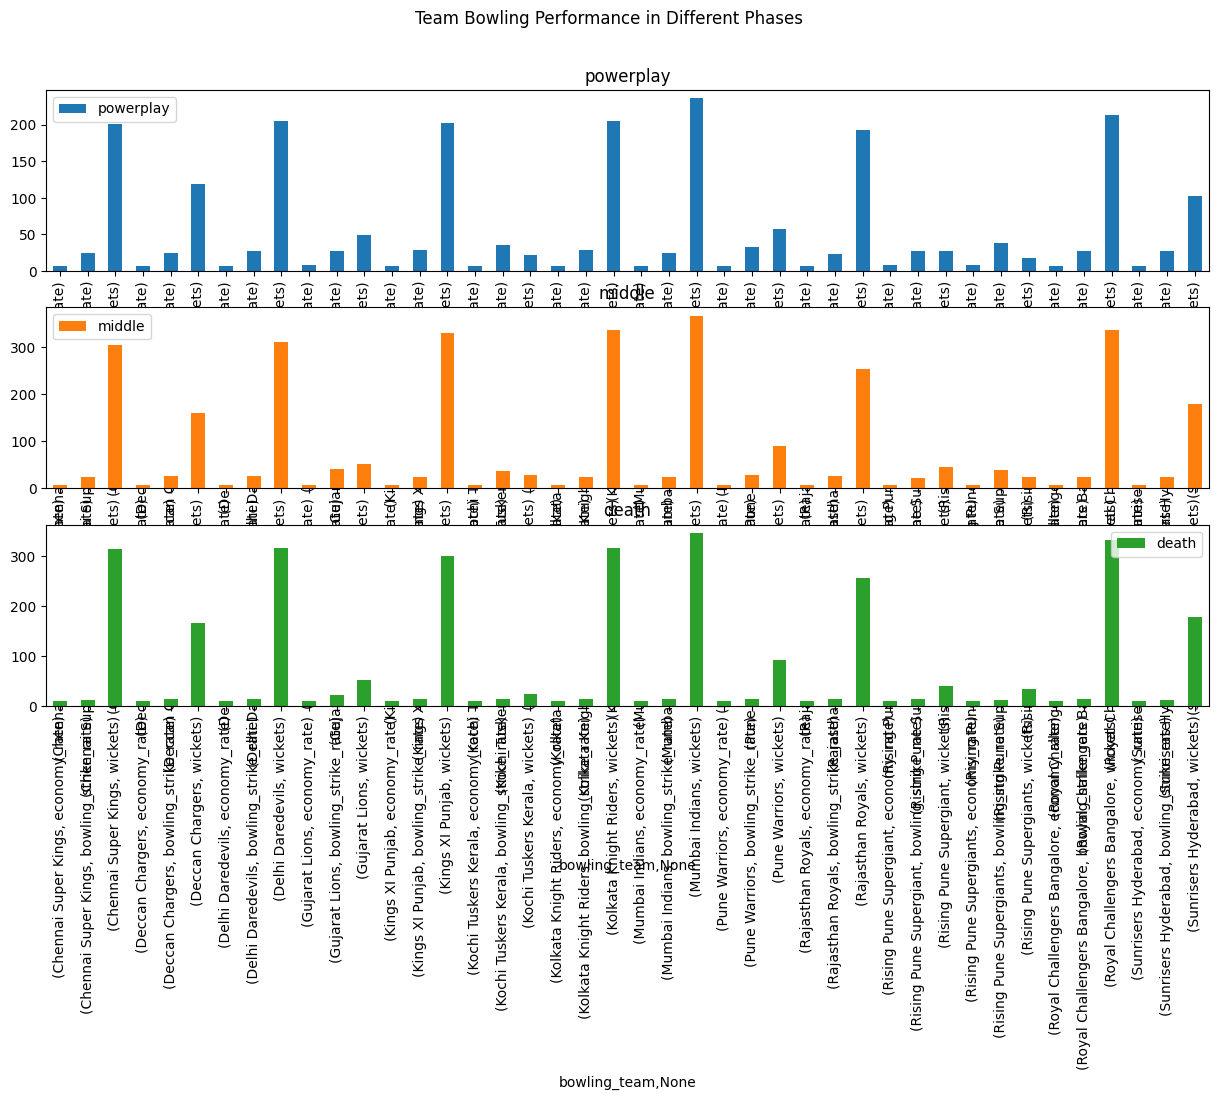

In [57]:
team_bowling_stats = match_deliveries.groupby(['bowling_team', 'over'])[['total_runs', 'ball']].agg({'total_runs':'sum', 'ball':'count'})
team_bowling_stats['economy_rate'] = (team_bowling_stats['total_runs'] / team_bowling_stats['ball']) * 6
team_bowling_stats['wickets'] = match_deliveries[match_deliveries['dismissal_kind'] != 'pass'].groupby(['bowling_team', 'over'])['dismissal_kind'].count()
team_bowling_stats = team_bowling_stats.fillna(0)

team_bowling_stats['bowling_strike_rate'] = team_bowling_stats['ball'] / team_bowling_stats['wickets']


powerplay = range(1,7)
middle = range(7,16)
death = range(16,21)

def phase_stats(df, phase_range):
  return df[df.index.get_level_values(1).isin(phase_range)].agg({'economy_rate':'mean', 'bowling_strike_rate':'mean', 'wickets': 'sum'})

team_bowling_phases = team_bowling_stats.groupby('bowling_team').apply(lambda x: pd.concat([
    phase_stats(x, powerplay).rename('powerplay'),
    phase_stats(x, middle).rename('middle'),
    phase_stats(x, death).rename('death')], axis=1))


# Display or plot the results
print(team_bowling_phases)

import matplotlib.pyplot as plt
team_bowling_phases.plot(kind='bar', figsize=(15, 8), subplots=True, layout=(3, 1), sharex=False)
plt.suptitle('Team Bowling Performance in Different Phases')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# What are the characteristics of successful batting partnerships in terms of runs scored and duration?

       partnership_runs  partnership_duration
count      53523.000000          53523.000000
mean          11.596398              3.231321
std           12.837353              2.536174
min            0.000000              1.000000
25%            2.000000              1.000000
50%            7.000000              2.000000
75%           16.000000              4.000000
max          133.000000             19.000000


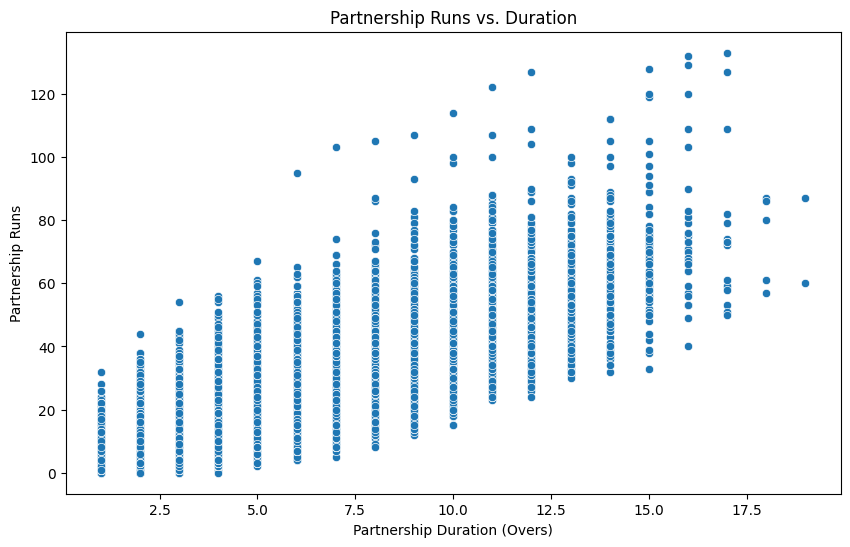

In [58]:
partnerships = deliveries.groupby(['match_id', 'inning', 'over', 'batsman', 'non_striker'])[['batsman_runs']].sum().reset_index()

# Assuming partnerships last until a wicket falls or the end of the over
partnerships['partnership_runs'] = partnerships.groupby(['match_id', 'inning', 'batsman', 'non_striker'])['batsman_runs'].cumsum()

# Basic duration: simply the number of balls faced in the partnership (not considering dismissals)
partnerships['partnership_duration'] = partnerships.groupby(['match_id', 'inning', 'batsman', 'non_striker'])['over'].cumcount()+1

print(partnerships[['partnership_runs', 'partnership_duration']].describe())

plt.figure(figsize=(10, 6))
sns.scatterplot(x='partnership_duration', y='partnership_runs', data=partnerships)
plt.title('Partnership Runs vs. Duration')
plt.xlabel('Partnership Duration (Overs)')
plt.ylabel('Partnership Runs')
plt.show()

# How do individual batsmen perform against specific bowlers? Are there any notable batsman-bowler matchups?

In [59]:
batsman_vs_bowler = deliveries.groupby(['batsman', 'bowler'])['batsman_runs'].agg(['sum', 'count']).reset_index()
batsman_vs_bowler.rename(columns={'sum': 'runs_scored', 'count': 'balls_faced'}, inplace=True)

# Calculate average runs per ball for each matchup
batsman_vs_bowler['avg_runs_per_ball'] = batsman_vs_bowler['runs_scored'] / batsman_vs_bowler['balls_faced']

# Filter for matchups with a minimum number of balls faced (e.g., 10 balls) to avoid unreliable averages
min_balls_faced = 10
significant_matchups = batsman_vs_bowler[batsman_vs_bowler['balls_faced'] >= min_balls_faced]

significant_matchups = significant_matchups.sort_values('avg_runs_per_ball', ascending=False)

print("\nTop 10 Batsman-Bowler Matchups (minimum 10 balls faced):")
print(significant_matchups.head(10))



Top 10 Batsman-Bowler Matchups (minimum 10 balls faced):
              batsman       bowler  runs_scored  balls_faced  \
2680         CH Gayle   AG Murtaza           43           11   
8508          M Vijay     S Narwal           58           17   
2773         CH Gayle       P Negi           31           10   
521    AB de Villiers    DJG Sammy           34           11   
5113       GJ Maxwell      GB Hogg           39           13   
6406        JP Duminy      A Singh           30           10   
3195        DA Miller  DS Kulkarni           36           12   
14395       SP Narine     S Badree           48           16   
16152        V Sehwag     JD Ryder           30           10   
6837       KA Pollard  NLTC Perera           50           17   

       avg_runs_per_ball  
2680            3.909091  
8508            3.411765  
2773            3.100000  
521             3.090909  
5113            3.000000  
6406            3.000000  
3195            3.000000  
14395           3.000

# Do certain batsmen have a higher tendency to get dismissed in specific ways?

In [61]:
dismissal_by_batsman = deliveries[deliveries['dismissal_kind'] != 'pass'].groupby(['batsman', 'dismissal_kind'])['dismissal_kind'].count().reset_index(name='dismissal_count')

top_dismissals = dismissal_by_batsman.loc[dismissal_by_batsman.groupby('batsman')['dismissal_count'].idxmax()]

top_dismissals.sort_values('dismissal_count', ascending=False)

,batsman,dismissal_kind,dismissal_count
1114,SK Raina,caught,94
1022,RV Uthappa,caught,87
971,RG Sharma,caught,83
390,G Gambhir,caught,77
1347,Yuvraj Singh,caught,76
...,...,...,...
1072,S Sriram,bowled,1
1069,S Sreesanth,bowled,1
328,DJ Muthuswami,run out,1
1064,S Randiv,caught,1


# How does the presence of specific batsmen at the crease impact the batting team's run rate?

In [62]:
batsman_run_rate = deliveries.groupby('batsman')['total_runs'].sum() / deliveries.groupby('batsman')['match_id'].count()

batsman_run_rate

,0
batsman,
A Ashish Reddy,1.469388
A Chandila,0.571429
A Chopra,0.773333
A Choudhary,1.250000
A Flintoff,1.263158
...,...
YV Takawale,1.131148
Yashpal Singh,0.731343
Younis Khan,0.428571


# How have average run rates and scoring patterns evolved across different IPL seasons?

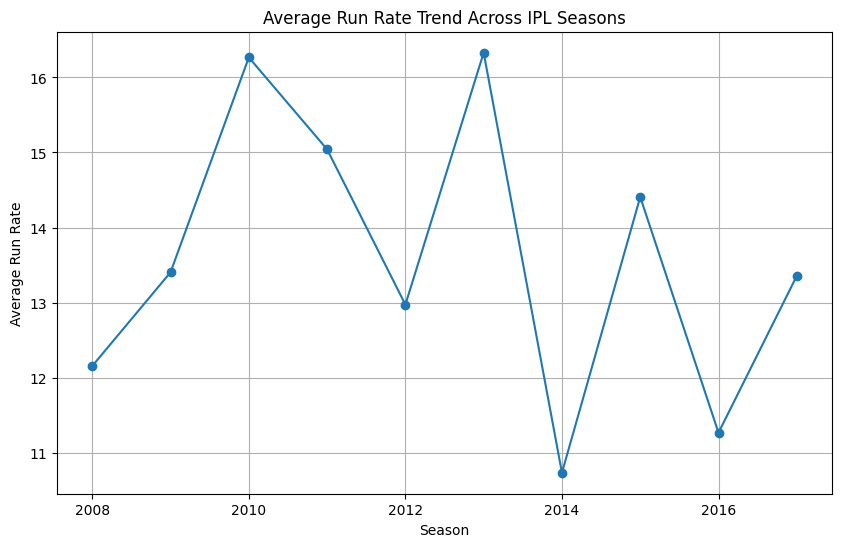

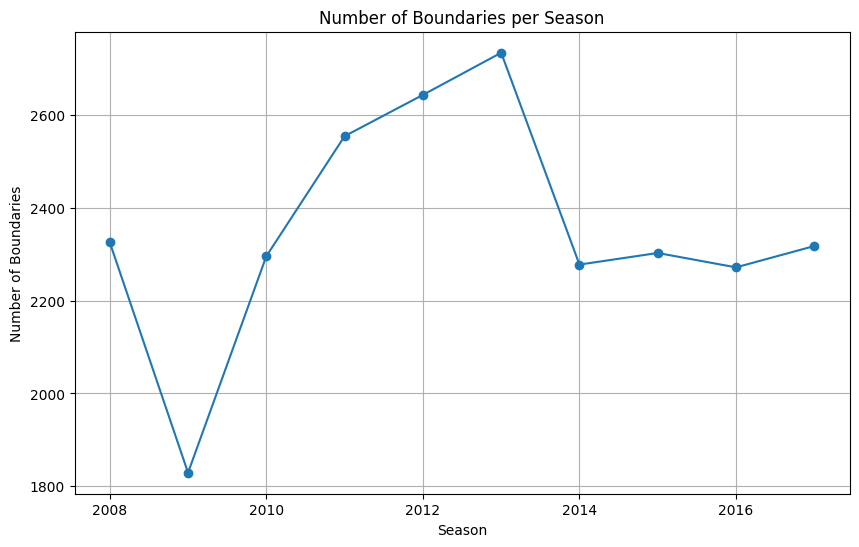

In [63]:
season_run_rate = matches.groupby('season')['win_by_runs'].mean()

plt.figure(figsize=(10, 6))
plt.plot(season_run_rate.index, season_run_rate.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Run Rate')
plt.title('Average Run Rate Trend Across IPL Seasons')
plt.grid(True)
plt.show()

season_boundaries = match_deliveries.groupby('season')['batsman_runs'].apply(lambda x: (x == 4).sum() + (x == 6).sum()).reset_index(name='boundary_count')

plt.figure(figsize=(10, 6))
plt.plot(season_boundaries['season'], season_boundaries['boundary_count'], marker='o')
plt.xlabel('Season')
plt.ylabel('Number of Boundaries')
plt.title('Number of Boundaries per Season')
plt.grid(True)
plt.show()

# Has the distribution of different dismissal types changed over the seasons?

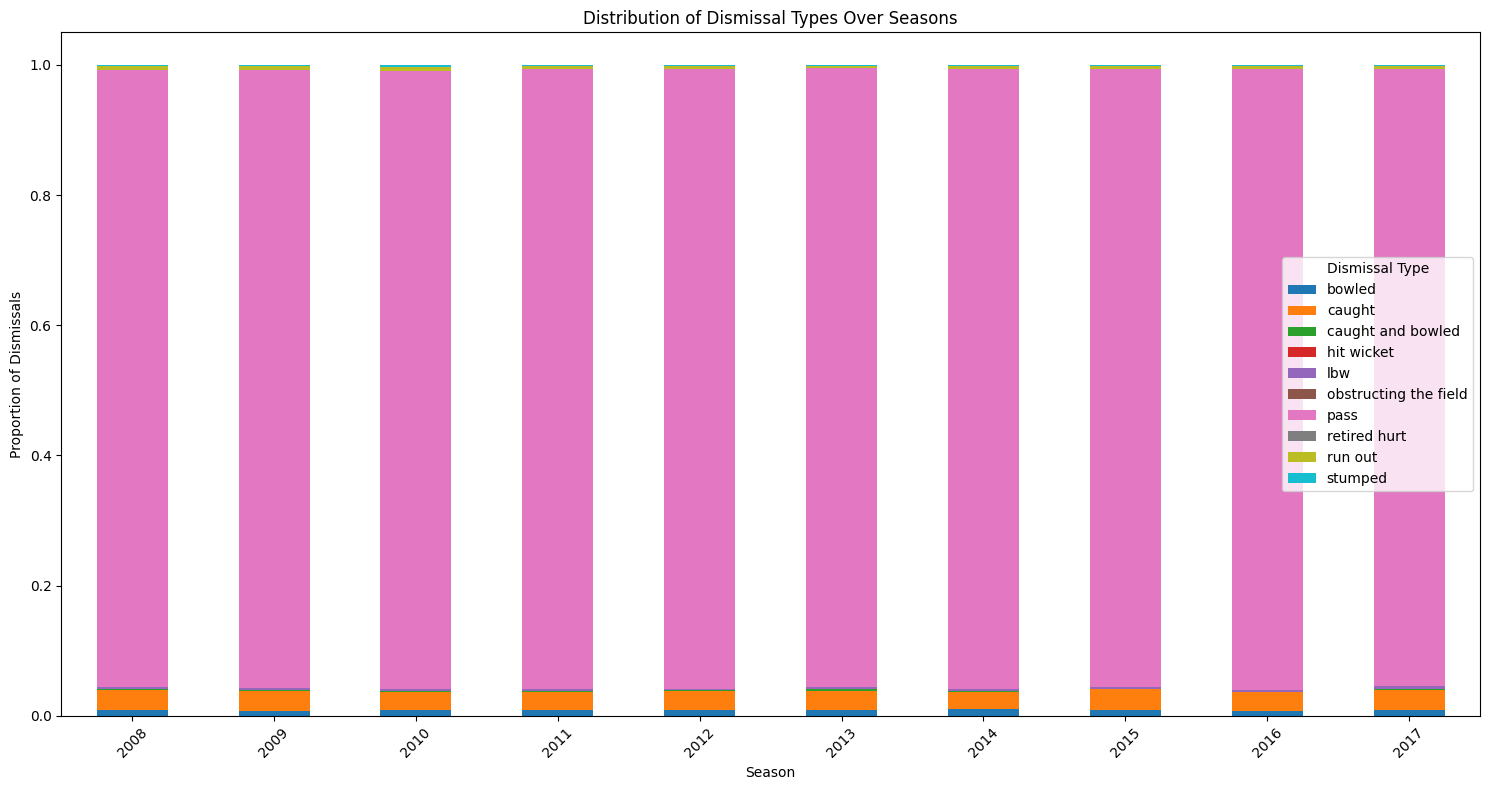

In [64]:
dismissals_by_season = match_deliveries[match_deliveries['dismissal_kind'].notna()].groupby(['season', 'dismissal_kind'])['dismissal_kind'].count().unstack()

dismissal_proportions = dismissals_by_season.div(dismissals_by_season.sum(axis=1), axis=0)

# Plotting the proportions
dismissal_proportions.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of Dismissal Types Over Seasons')
plt.xlabel('Season')
plt.ylabel('Proportion of Dismissals')
plt.xticks(rotation=45)
plt.legend(title='Dismissal Type')
plt.tight_layout()
plt.show()

# How do average runs scored and wickets taken per match differ across various venues?

                                                    avg_runs_per_match  \
venue                                                                    
Barabati Stadium                                             10.428571   
Brabourne Stadium                                            12.363636   
Buffalo Park                                                 29.000000   
De Beers Diamond Oval                                        17.666667   
Dr DY Patil Sports Academy                                   11.588235   
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...           25.636364   
Dubai International Cricket Stadium                           3.714286   
Eden Gardens                                                  9.622951   
Feroz Shah Kotla                                             14.600000   
Green Park                                                    0.000000   
Himachal Pradesh Cricket Association Stadium                 31.000000   
Holkar Cricket Stadium                

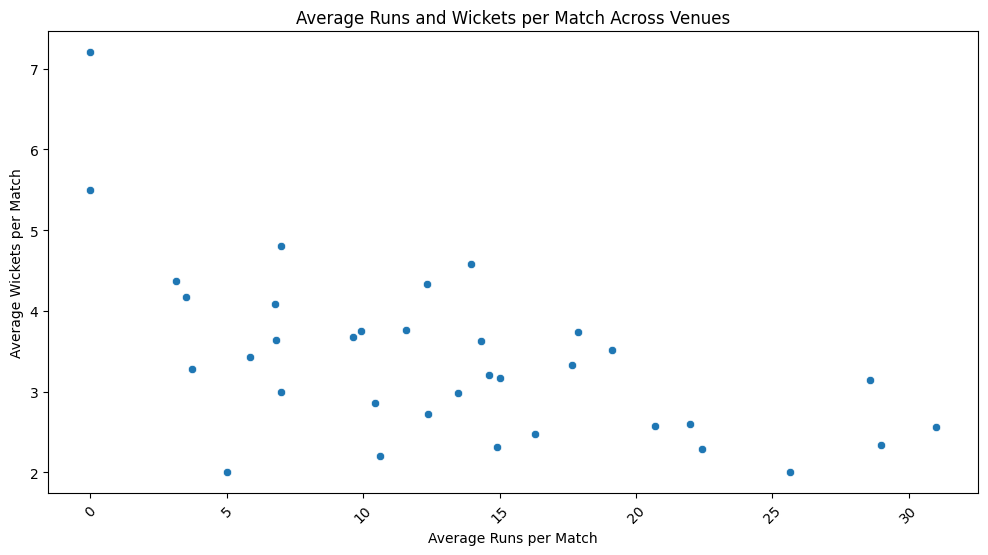

In [65]:
venue_stats = matches.groupby('venue').agg({'win_by_runs': 'mean', 'win_by_wickets': 'mean'})

venue_stats = venue_stats.rename(columns={'win_by_runs': 'avg_runs_per_match', 'win_by_wickets': 'avg_wickets_per_match'})

print(venue_stats)

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_runs_per_match', y='avg_wickets_per_match', data=venue_stats)
plt.xlabel('Average Runs per Match')
plt.ylabel('Average Wickets per Match')
plt.title('Average Runs and Wickets per Match Across Venues')
plt.xticks(rotation=45)
plt.show()

# Is there a significant difference in batting team performance between the first and second innings?

T-statistic: 7.974125408751658
P-value: 3.401003228709077e-15
There is a statistically significant difference in batting team performance between the first and second innings.


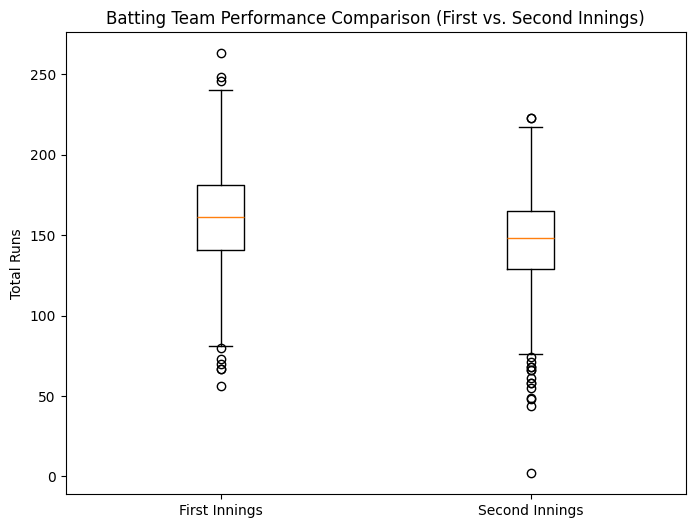

In [67]:
first_innings = match_deliveries[match_deliveries['inning'] == 1].groupby('match_id')['total_runs'].sum()
second_innings = match_deliveries[match_deliveries['inning'] == 2].groupby('match_id')['total_runs'].sum()

t_statistic, p_value = stats.ttest_ind(first_innings, second_innings)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in batting team performance between the first and second innings.")
else:
    print("There is no statistically significant difference in batting team performance between the first and second innings.")

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([first_innings, second_innings], labels=['First Innings', 'Second Innings'])
plt.ylabel('Total Runs')
plt.title('Batting Team Performance Comparison (First vs. Second Innings)')
plt.show()

# Analyze how the average win by runs has changed across seasons. Is there a trend towards higher or lower scoring matches?

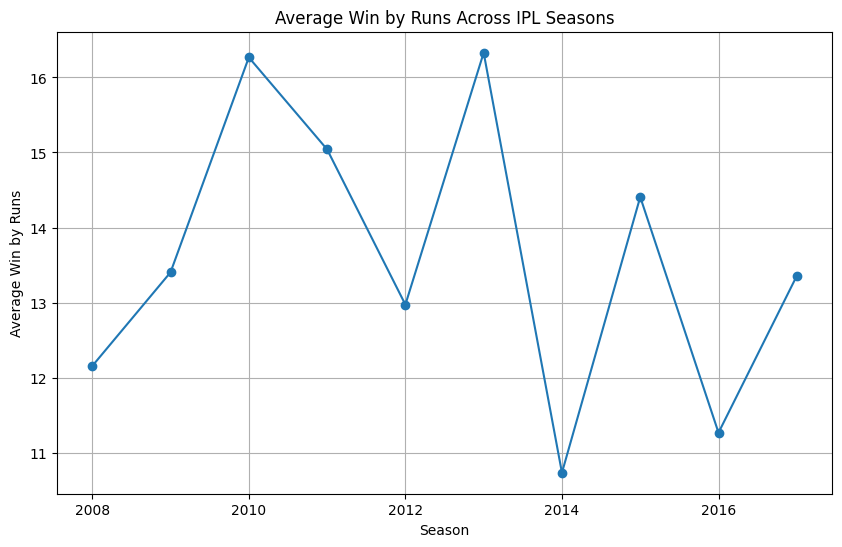

In [68]:
season_win_runs = matches.groupby('season')['win_by_runs'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(season_win_runs.index, season_win_runs.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Win by Runs')
plt.title('Average Win by Runs Across IPL Seasons')
plt.grid(True)
plt.show()